---
---
# Previsão do Nível de Satisfação dos Clientes do Santander

### _Santander Customer Satisfaction_
---
---

##  Engenharia de Atributos // _Feature Engineering_

In [1]:
# Versão da Linguagem Python // Python language version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Installs pyarrow
#!pip install pyarrow

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pyarrow
import warnings
warnings.filterwarnings("ignore")

from utils import *

In [4]:
# Versões dos pacotes usados neste jupyter notebook // Versions of packages used in this jupyter notebook
#!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Tatiana Novaes Carvalho" --iversions

Author: Tatiana Novaes Carvalho

seaborn   : 0.11.2
matplotlib: 3.5.1
scipy     : 1.7.3
pandas    : 1.4.2
pyarrow   : 9.0.0
numpy     : 1.22.3



### DATASET DE TREINO | _TRAINING DATA SET_

### Carga dos dados // _Data load_

In [5]:
# Carrega os dados // Load the data
file = 'df_train_cleaned'
df_train = pd.read_parquet(f'../datasets/{file}.dat')

In [6]:
df_train.shape

(47985, 319)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 56183 to 1703
Columns: 319 entries, var3 to TARGET
dtypes: float64(157), int64(162)
memory usage: 117.2 MB


In [8]:
df_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
56183,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
43354,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407115.540000,0
31400,2.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85564.710000,0
123436,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
109140,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72880.980000,0


### Separação das Variáveis  // _Separation of Variables_

In [9]:
# Identificação das variáveis  // Variables identification

# Definição da variável-alvo // Target definition
target = 'TARGET'

# Separação das variáveis categóricas e numéricas // Separation of categorial and numerical features
cat_features, num_features = identify_variables_type(df_train, target)

print(f'Quantidade de variáveis categóricas: {len(cat_features)}')
print(f'Quantidade de variáveis numéricas: {len(num_features)}')

Quantidade de variáveis categóricas: 189
Quantidade de variáveis numéricas: 129


In [10]:
# Conversão dos tipos de dados das variáveis // Conversion of variables data types

df = convert_variables_dtype(df_train, cat_features, num_features, target)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 56183 to 1703
Columns: 319 entries, var3 to TARGET
dtypes: category(190), float64(129)
memory usage: 56.3 MB


In [11]:
# Checking missing value
df_train.isnull().any().sum()

0

### Engenharia de Atributos

#### Variáveis Numéricas // Numerical Variables

> Multicolinearidade

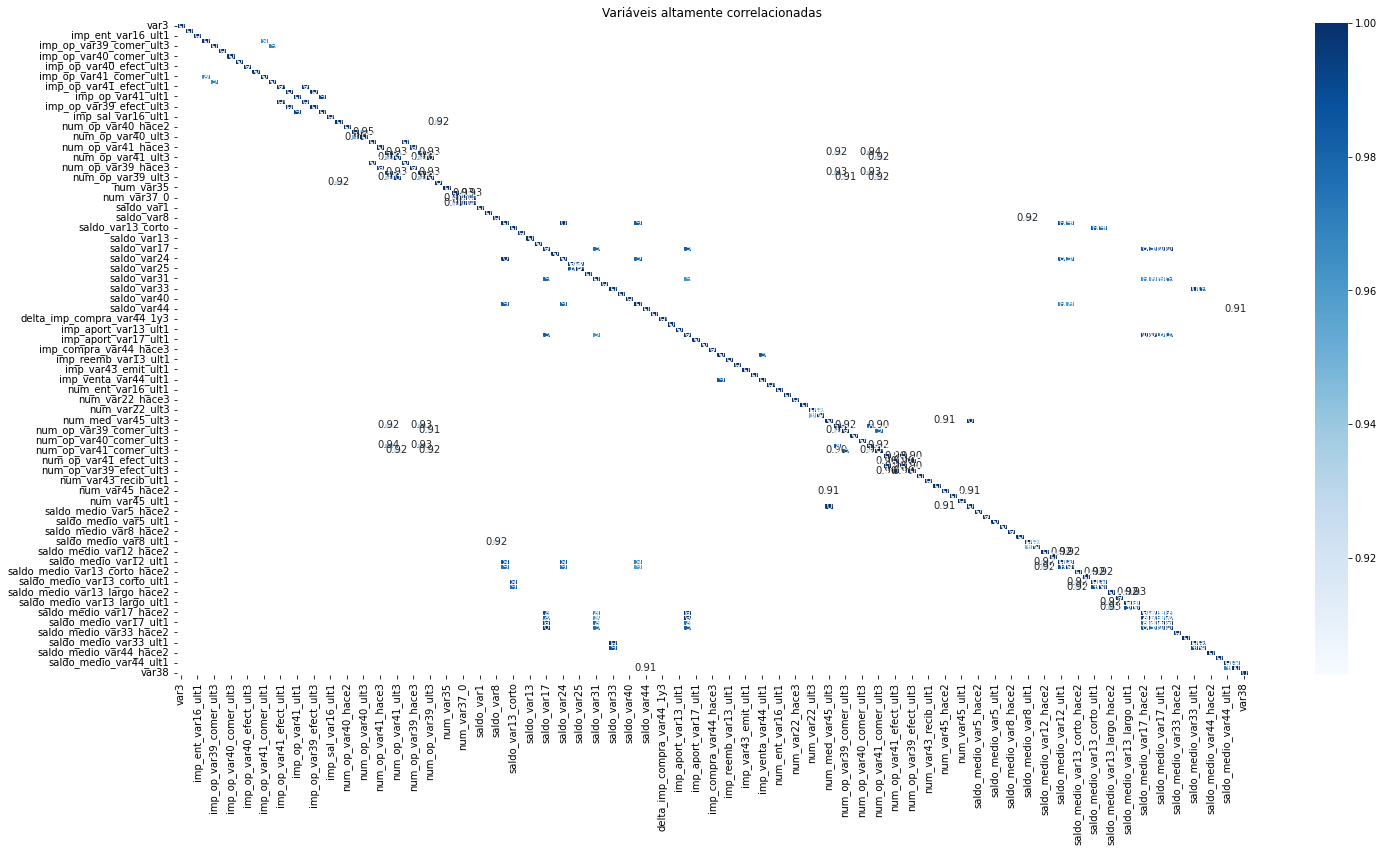

In [12]:
# Matriz de correlação para as variáveis preditoras numéricas // Correlation matrix for numerical predictor variables
corr_df_train = df_train[num_features].corr()

# Matriz com filtro de correlação maior ou igual a .9
high_corr_df = corr_df_train[corr_df_train >= .9]

# Heatmap das correlações entre as variáveis numéricas
plt.figure(figsize = (24, 12))
sns.heatmap(high_corr_df, cmap = 'Blues', annot = True, linewidths = .5, fmt = '.2f')
plt.title('Variáveis altamente correlacionadas');

In [13]:
# Identificação de atributos com correlação superior a 0.9 (indicação de multicolinearidade)
# Identification of attributes with correlation greater than 0.9 (indication of multicollinearity)

dict_corr, correlated_features = identify_high_corr_var(corr_df_train, .9)

print(f'Quantidade de variáveis com alta correlação (> .9): {len(dict_corr.keys())}')
print()
print(f'Quantidade de variáveis a serem excluídas do dataset: {len(correlated_features)}')
print()
for key, value in dict_corr.items():
    print(f'Variáveis com alta correlação ({key}): {value}')


Quantidade de variáveis com alta correlação (> .9): 89

Quantidade de variáveis a serem excluídas do dataset: 48

Variáveis com alta correlação (0.9654336205909597): ['imp_op_var39_comer_ult1', 'imp_op_var41_comer_ult1']
Variáveis com alta correlação (0.9676116990259596): ['imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult3']
Variáveis com alta correlação (0.9992775358452358): ['imp_op_var39_efect_ult1', 'imp_op_var41_efect_ult1']
Variáveis com alta correlação (0.9995670500991258): ['imp_op_var39_efect_ult3', 'imp_op_var41_efect_ult3']
Variáveis com alta correlação (0.9928498996951467): ['imp_op_var39_ult1', 'imp_op_var41_ult1']
Variáveis com alta correlação (0.9241883843179312): ['num_var17_0', 'num_var31_0']
Variáveis com alta correlação (0.9472458819950723): ['num_op_var40_ult1', 'num_op_var40_ult3']
Variáveis com alta correlação (0.9970927902626164): ['num_op_var39_hace2', 'num_op_var41_hace2']
Variáveis com alta correlação (0.9994730656717542): ['num_op_var39_hace3', 'num_op_var41

In [14]:
# Remoção de variáveis devido à presença de multicolinearidade
# Removal of variables due to the presence of multicollinearity

#corr_features = [value[0] for key, value in dict_corr.items()]
print(f'Variáveis excluídas por multicolinearidade: {correlated_features}')
df_train2 = df_train.drop(columns = correlated_features)
df_train2.shape

Variáveis excluídas por multicolinearidade: ['imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'num_var31_0', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult3', 'num_op_var41_ult1', 'num_op_var39_ult3', 'num_op_var39_ult1', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_var37_med_ult2', 'num_var37_0', 'saldo_var8', 'saldo_var24', 'saldo_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var31', 'saldo_var17', 'saldo_var26', 'saldo_var33', 'saldo_var44', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'imp_venta_var44_ult1', 'num_var22_ult3', 'num_var45_hace2', 'num_var45_ult3', 'num_op_var39_comer_ult3', 'num_op_var41_efect_ult3', 'num_op_var41_efect_ult1', 'num_op_var39_efect_ult3', 'saldo_medio_var8_ult3', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_v

(47985, 271)

**Observação:**
Tendo em vista a multicolinearidade entre diversas variáveis (coeficiente de correlação igual ou maior que 0,9), foram excluídos 73 atributos do conjunto de dados.

---
_**Observation:**_
_Considering the multicollinearity between several variables (correlation coefficient equal to or greater than 0.9), 73 attributes were excluded from the data set._


In [15]:
# Resumo estatístico das variáveis numéricas restantes // Statistical summary of remaining numeric variables
df_train2.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38
count,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,...,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000,4.798500e+04
mean,-1539.415005,33.518537,95.205411,75.184973,124.096710,3.440749,6.180015,0.391626,0.605609,3.103537,...,552.070843,777.343984,162.550481,7.154435,1.353385,11.755151,38.713196,1.977565,82.197767,1.162890e+05
std,39240.386024,13.085462,1811.251393,343.108651,547.500568,89.672569,138.918487,20.824827,32.159056,87.588030,...,7125.920619,12864.902357,4765.120642,412.860984,119.184532,667.038902,2465.338473,158.599189,4503.375104,1.836182e+05
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.604359e+04
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.008271e+05
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.224037e+05
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,1800.000000,3810.000000,8237.820000,...,290322.570000,568965.480000,534000.000000,50003.880000,20385.720000,63317.190000,438329.220000,24650.010000,681462.900000,2.203474e+07


In [16]:
# Variáveis numéricas restantes após remoção de atributos correlacionados
# Numerical variables remaining after removing correlated attributes

set_num_features = set(num_features)
set_corr_features = set(correlated_features)
num_features_no_corr = list(set_num_features - set_corr_features)
len(num_features_no_corr)

81

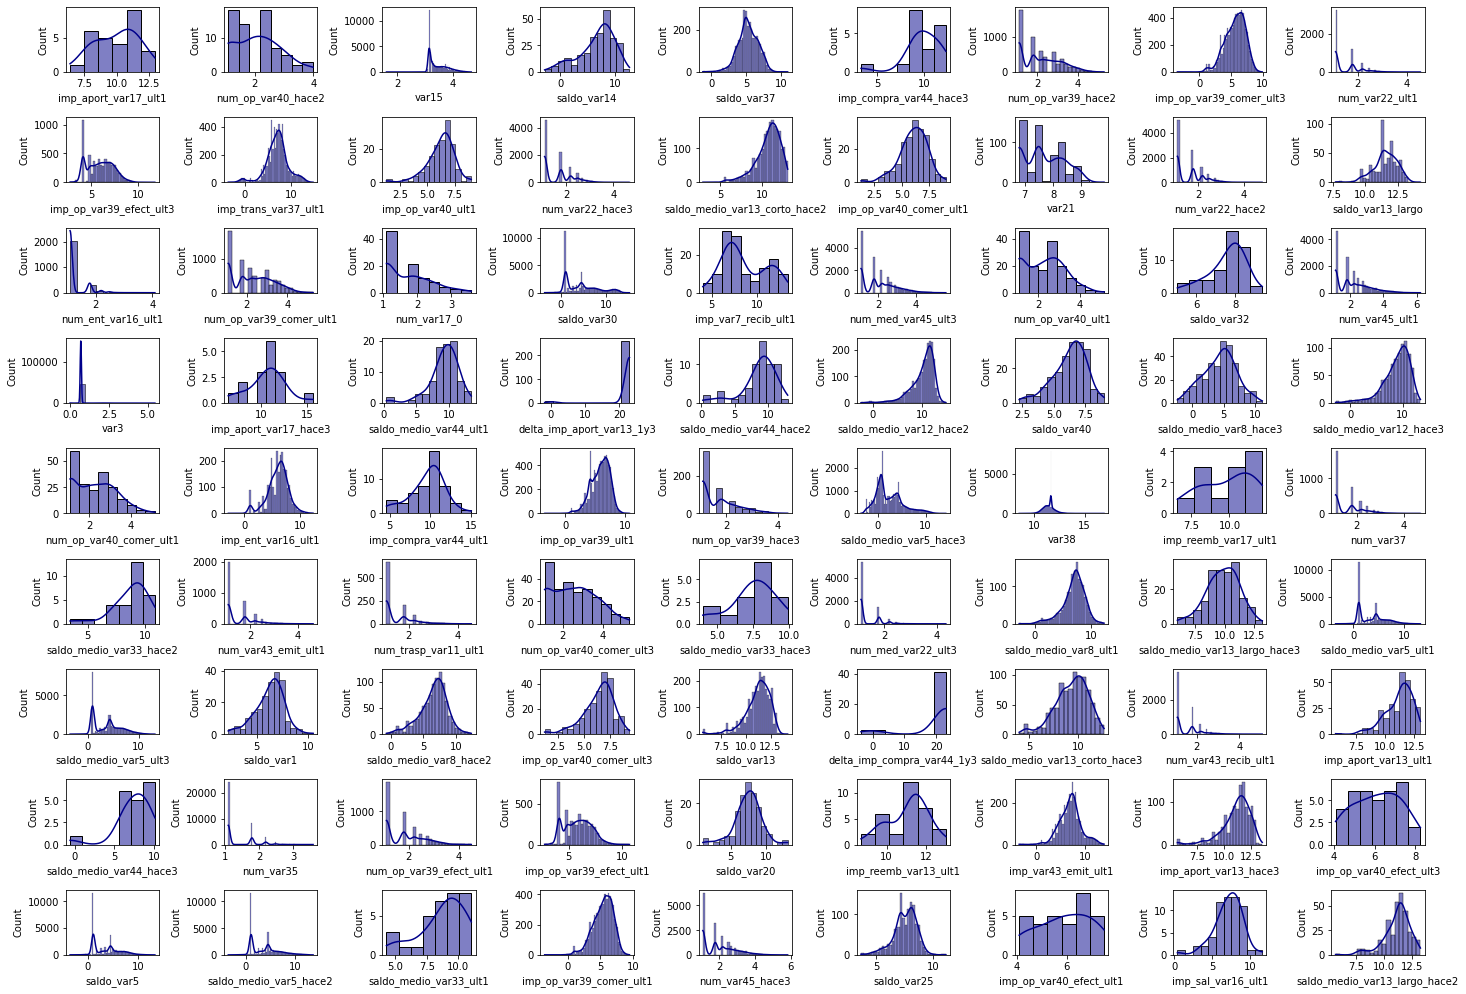

In [17]:
# Aprofundamento da análise das variáveis com transformação logarítmica
# Deepening the analysis of variables with logarithmic transformation

def plot_distplot_log(df, features_list:list, qtd_subplots:int=10, color:str='darkblue', orient:str='v'):
    """
    Função para análise univariada das variáveis numéricas utilizando gráficos distplots da biblioteca Seaborn.
    Function for univariate analysis of numerical variables using distplot plots from the Seaborn library.
    """
    plt.figure(figsize = (20, 15))
    for i in range(0, len(features_list)):
        plt.subplot(qtd_subplots, int(len(features_list)/qtd_subplots) + 1, i+1)
        chart = sns.histplot(x = np.log(df[features_list[i]]), kde = True, color = color)
        plt.xlabel(features_list[i])
        plt.tight_layout()
    
    return chart

# Chamada à função
plot_distplot_log(df=df_train2, features_list=num_features_no_corr);

In [18]:
print(num_features_no_corr)

['imp_aport_var17_ult1', 'num_op_var40_hace2', 'var15', 'saldo_var14', 'saldo_var37', 'imp_compra_var44_hace3', 'num_op_var39_hace2', 'imp_op_var39_comer_ult3', 'num_var22_ult1', 'imp_op_var39_efect_ult3', 'imp_trans_var37_ult1', 'imp_op_var40_ult1', 'num_var22_hace3', 'saldo_medio_var13_corto_hace2', 'imp_op_var40_comer_ult1', 'var21', 'num_var22_hace2', 'saldo_var13_largo', 'num_ent_var16_ult1', 'num_op_var39_comer_ult1', 'num_var17_0', 'saldo_var30', 'imp_var7_recib_ult1', 'num_med_var45_ult3', 'num_op_var40_ult1', 'saldo_var32', 'num_var45_ult1', 'var3', 'imp_aport_var17_hace3', 'saldo_medio_var44_ult1', 'delta_imp_aport_var13_1y3', 'saldo_medio_var44_hace2', 'saldo_medio_var12_hace2', 'saldo_var40', 'saldo_medio_var8_hace3', 'saldo_medio_var12_hace3', 'num_op_var40_comer_ult1', 'imp_ent_var16_ult1', 'imp_compra_var44_ult1', 'imp_op_var39_ult1', 'num_op_var39_hace3', 'saldo_medio_var5_hace3', 'var38', 'imp_reemb_var17_ult1', 'num_var37', 'saldo_medio_var33_hace2', 'num_var43_emit_u

**Observações:**
1. Mesmo após o tratamento dos dados, inclusive a remoção de outliers, algumas variáveis parecem não seguir uma distribuição normal (comportamento de uma distribuição uniforme). Assim sendo, essas variáveis serão excluídas do conjunto de dados. São elas: num_var43_emit_ult1, delta_imp_aport_var13_1y3, num_var37, num_trasp_var11_ult1, num_var35, num_var45_ult1, num_ent_var16_ult1, num_var30_0, num_var22_ult1, num_op_var39_efect_ult1, num_var43_recib_ult1, num_var22_hace3, num_var22_hace2.
2. As demais variáveis, embora assimétricas em sua maioria, parecem seguir uma distribuição semelhante à normal, motivo pelo qual serão mantidas no conjunto de dados.
---

**Observations:**
1. _Even after processing the data, including removing outliers, some variables do not seem to follow a normal distribution (behavior of a uniform distribution). Therefore, these variables will be excluded from the dataset. They are: num_var43_emit_ult1, delta_imp_aport_var13_1y3, num_var37, num_trasp_var11_ult1, num_var35, num_var45_ult1, num_ent_var16_ult1, num_var30_0, num_var22_ult1, num_op_var39_efect_ult1, num_var43_recib_ult1, num_var22_hace3, num_var22_hace2._
2. _The other variables, although mostly asymmetric, seem to follow a distribution similar to the normal, which is why they will be kept in the data set._


In [19]:
# Remoção de atributos com distribuição que não segue uma distribuição gaussiana
# Removing attributes with distribution that does not follow a Gaussian distribution

not_gauss_feat = ['num_var43_emit_ult1', 'delta_imp_aport_var13_1y3', 'num_var37', 'num_trasp_var11_ult1', 'num_var35',
                  'num_var45_ult1', 'num_ent_var16_ult1', 'var3', 'num_var22_ult1', 'num_op_var39_efect_ult1', 
                  'num_var43_recib_ult1', 'num_var22_hace3', 'num_var22_hace2']

print(f'Variáveis excluídas devido à forma da distribuição: {not_gauss_feat}')
df_train3 = df_train2.drop(columns = not_gauss_feat)
df_train3.shape


Variáveis excluídas devido à forma da distribuição: ['num_var43_emit_ult1', 'delta_imp_aport_var13_1y3', 'num_var37', 'num_trasp_var11_ult1', 'num_var35', 'num_var45_ult1', 'num_ent_var16_ult1', 'var3', 'num_var22_ult1', 'num_op_var39_efect_ult1', 'num_var43_recib_ult1', 'num_var22_hace3', 'num_var22_hace2']


(47985, 258)

In [20]:
# Variáveis numéricas restantes após remoção devido a forma de distribuição
# Numerical variables remaining after removal due to distribution form

set_num_features_no_corr = set(num_features_no_corr)
set_not_gauss_feat = set(not_gauss_feat)
num_features_left = list(set_num_features_no_corr - set_not_gauss_feat)
len(num_features_left)

68

In [21]:
# Checando variância dos atributos

for col in num_features_left:
    if df_train3[col].var()==0:
        print(col)

# Nenhuma das variáveis mantidas tem variância zero

In [22]:
cat_features

['ind_var1_0',
 'ind_var1',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var30',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var40_0',
 'ind_var40',
 'ind_var41_0',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'num_var1_0',
 'num_var1',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var6_0',
 'num_var6',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_v

#### Variáveis Categóricas // Categorical Variables

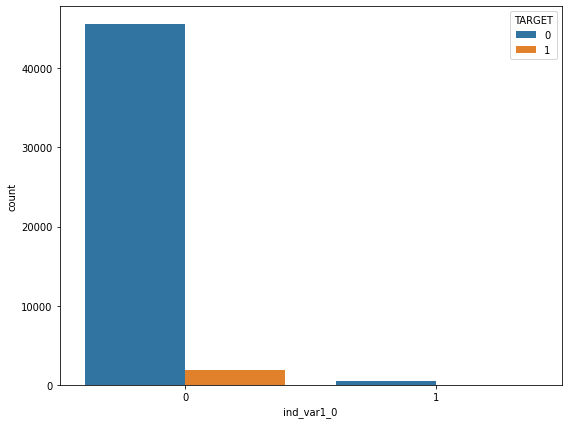

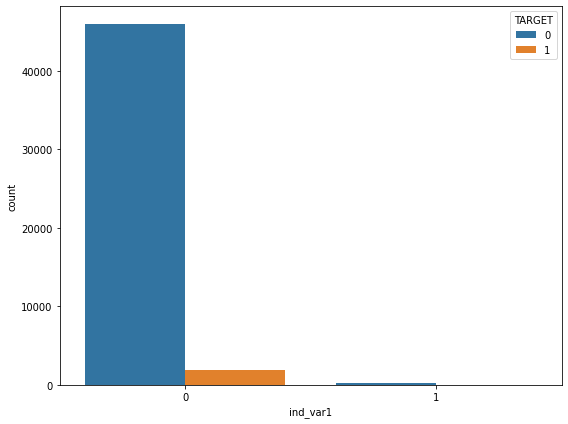

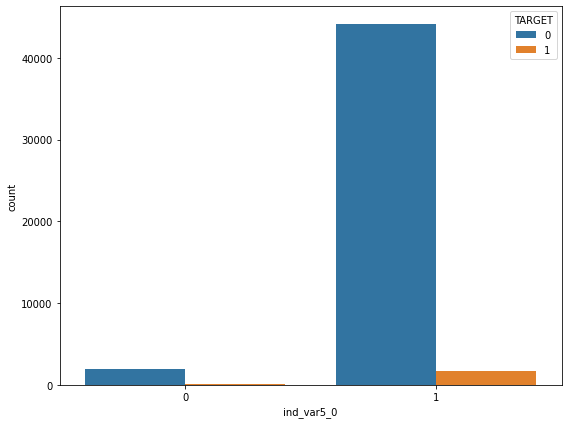

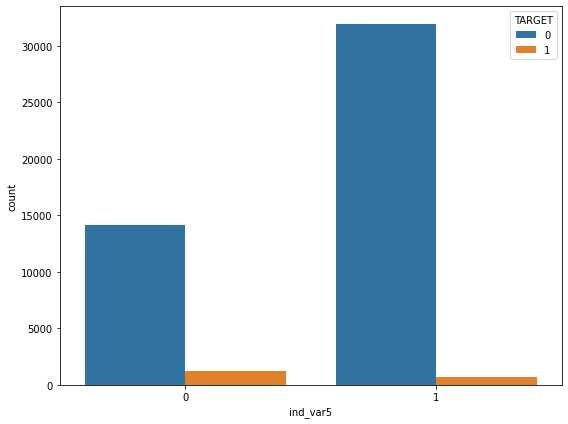

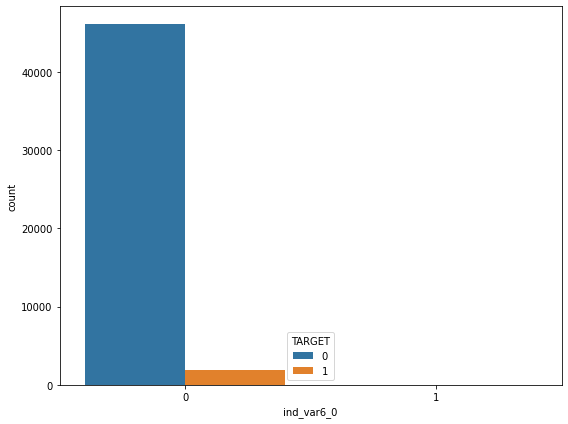

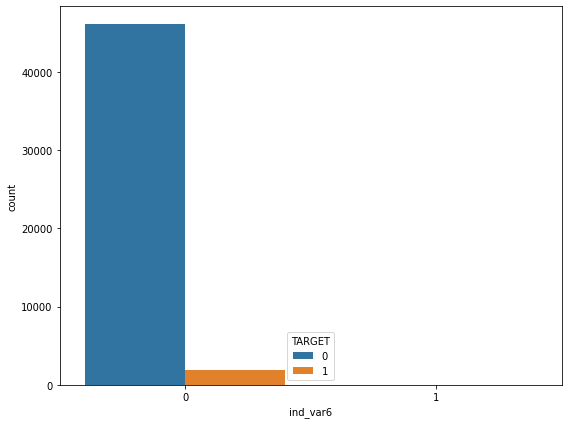

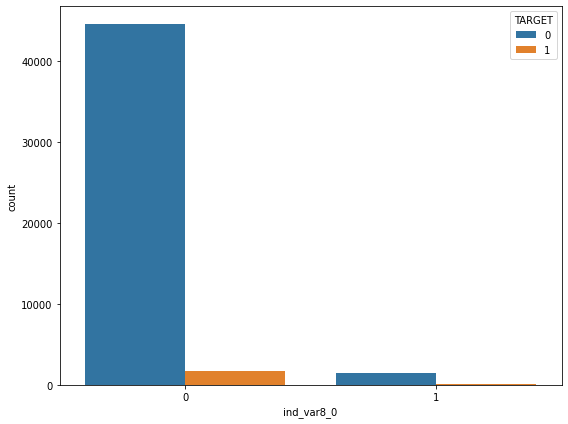

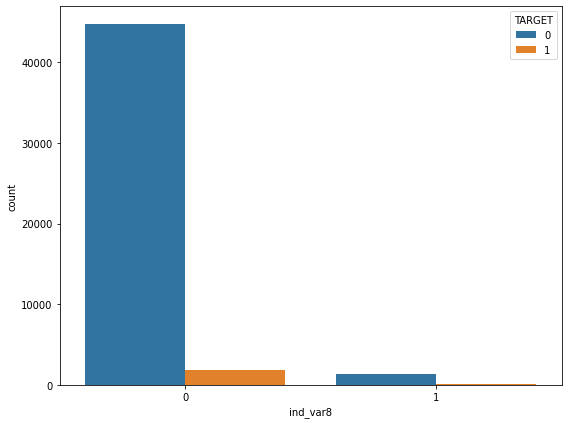

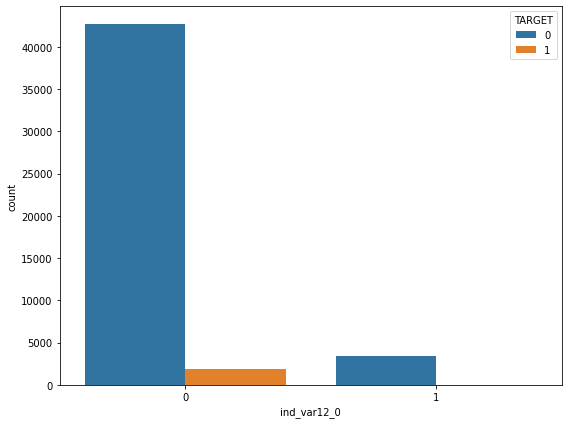

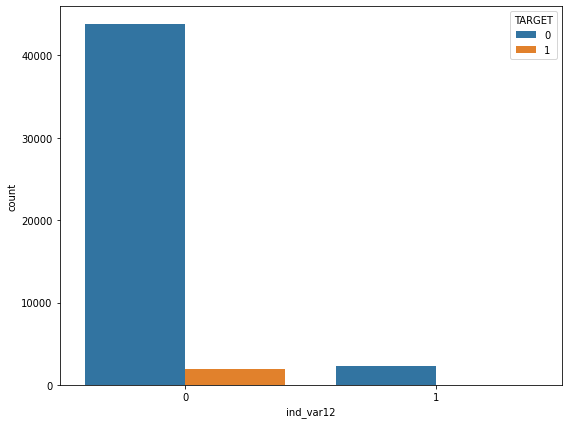

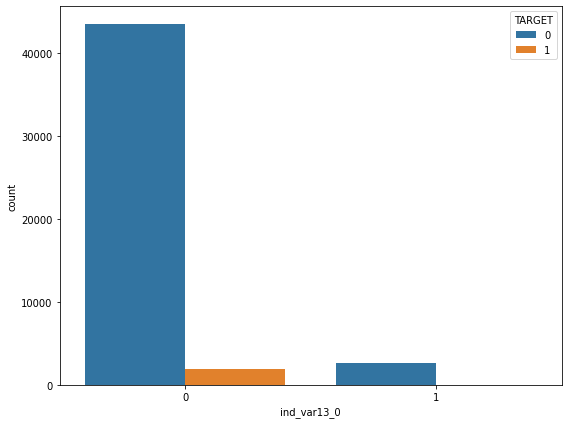

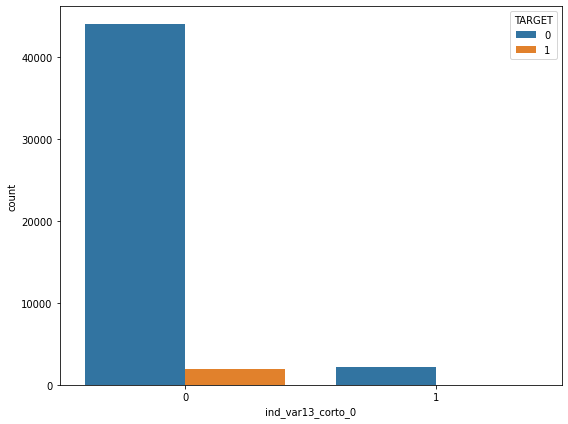

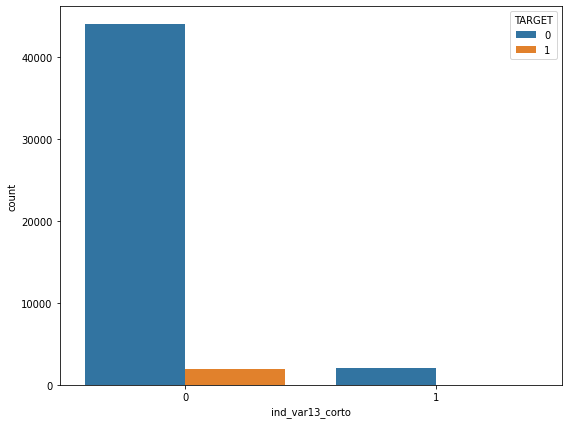

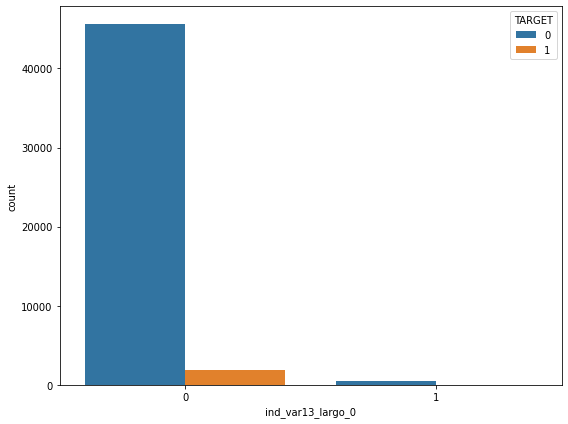

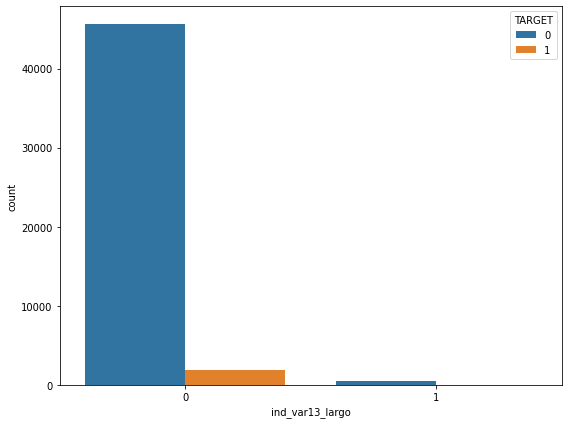

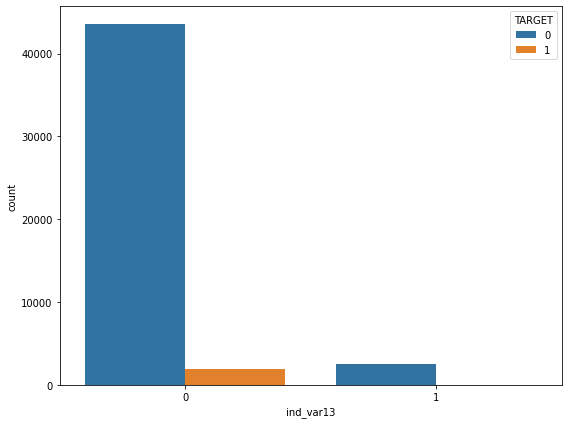

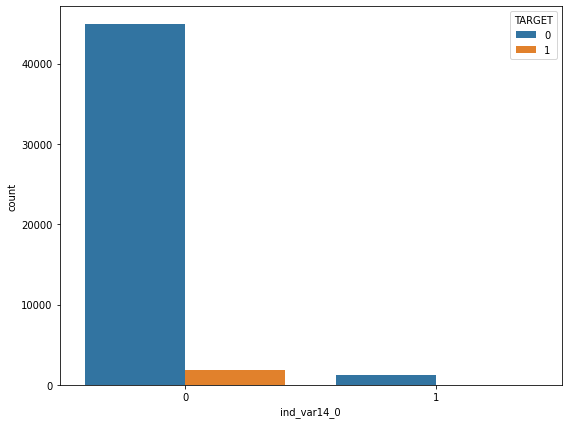

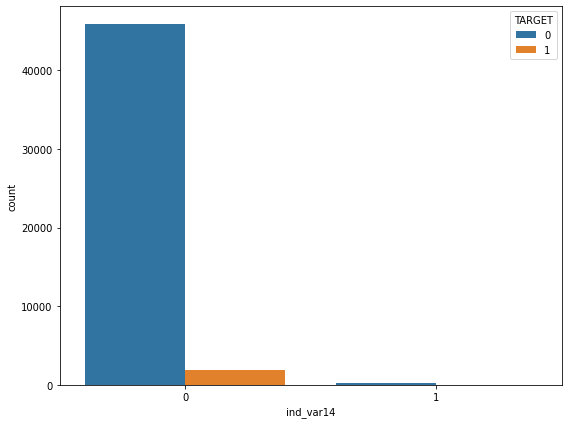

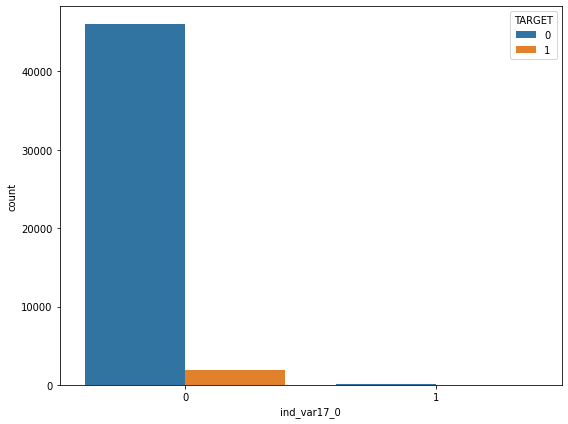

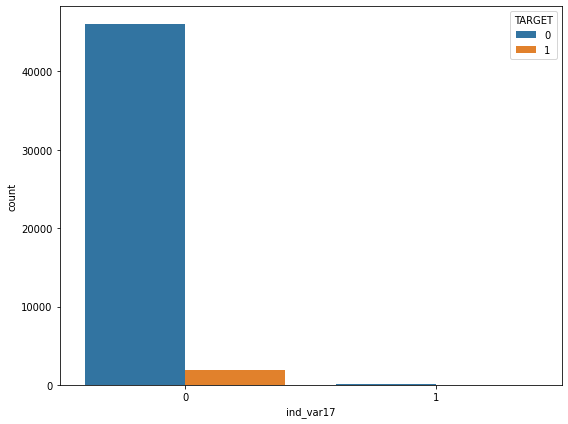

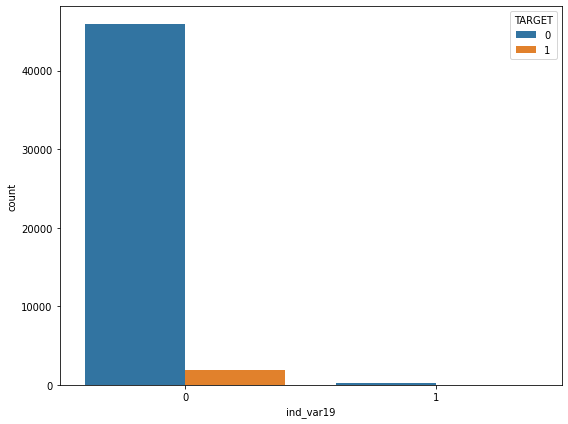

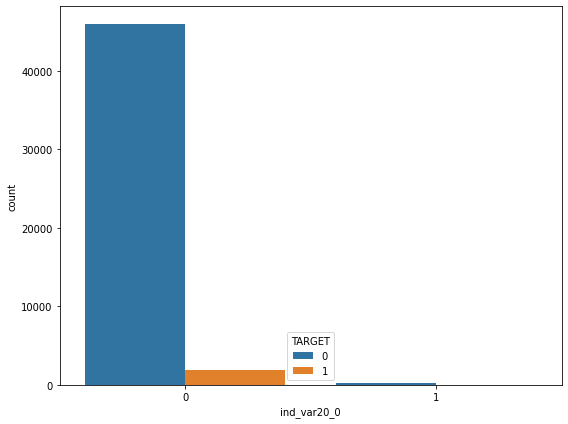

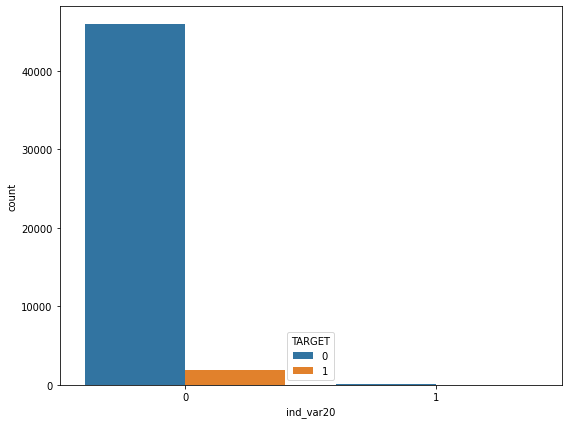

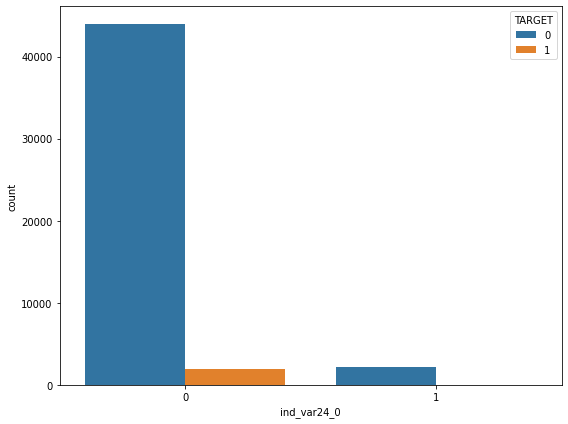

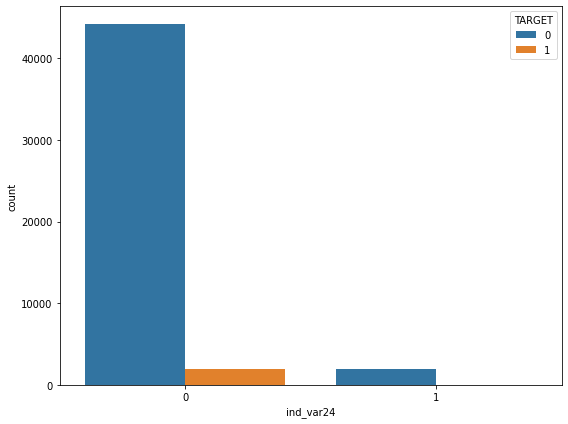

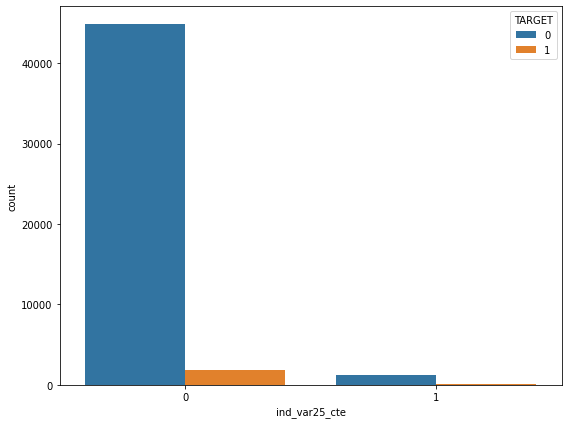

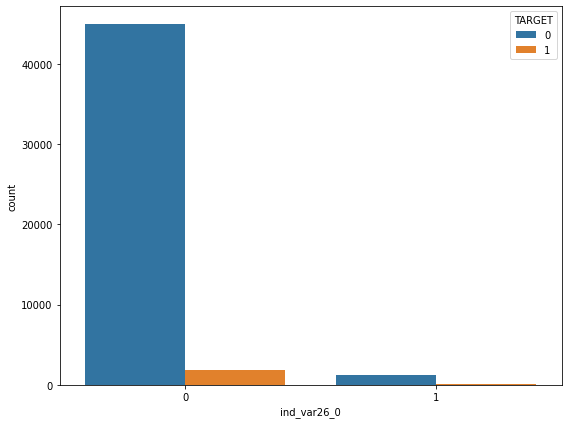

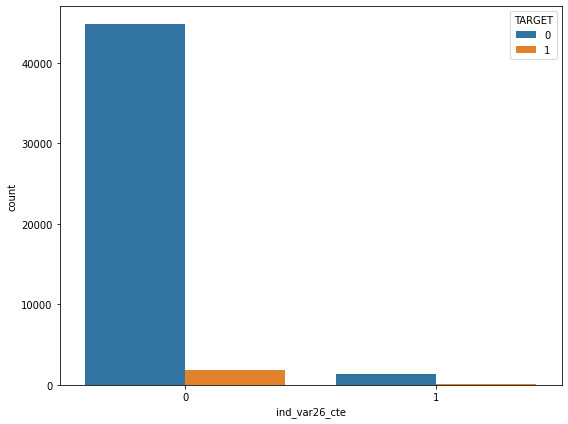

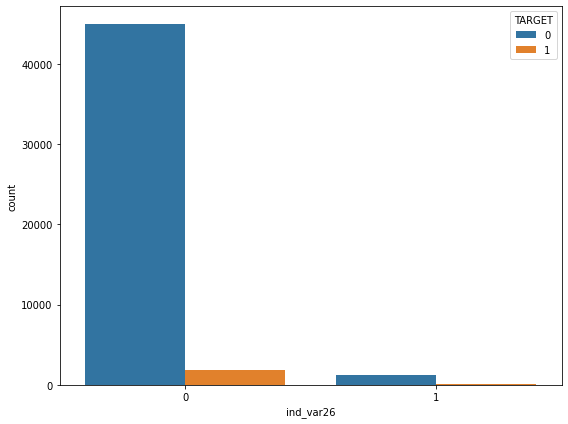

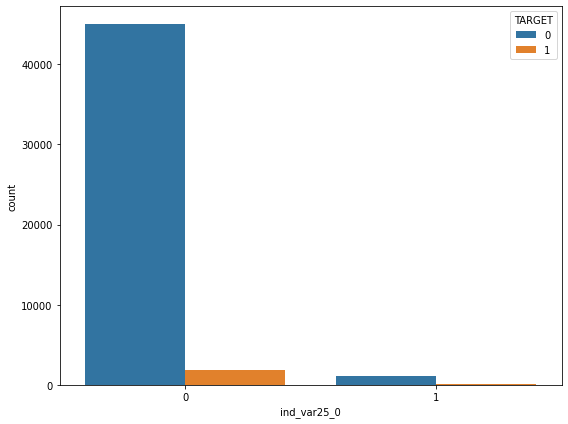

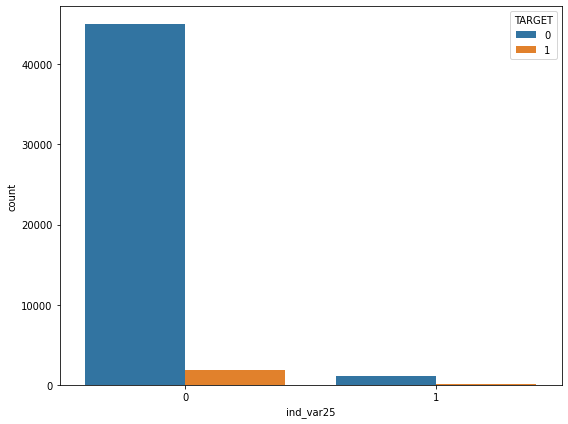

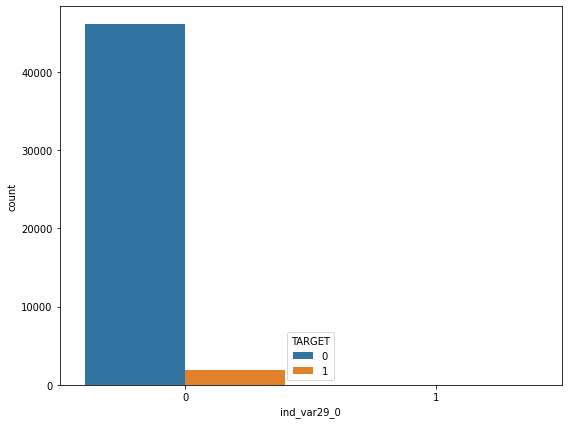

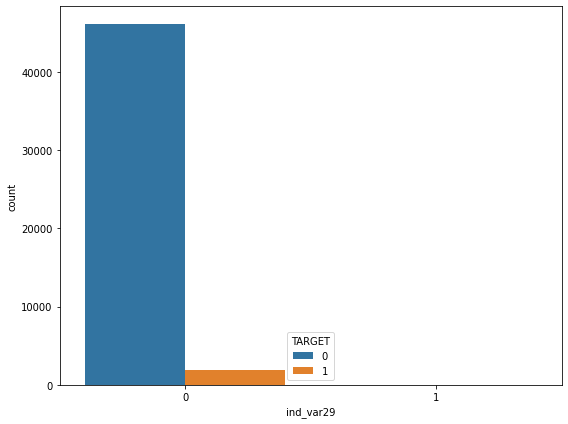

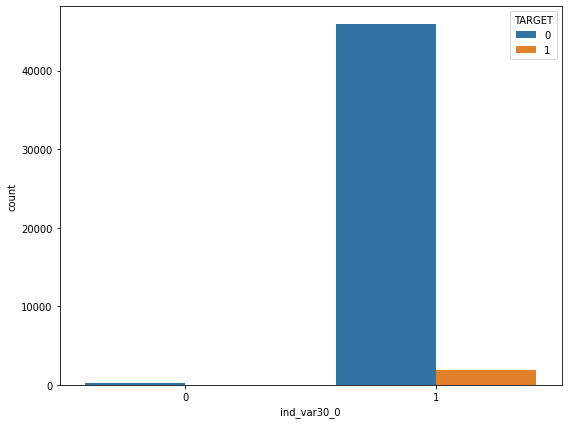

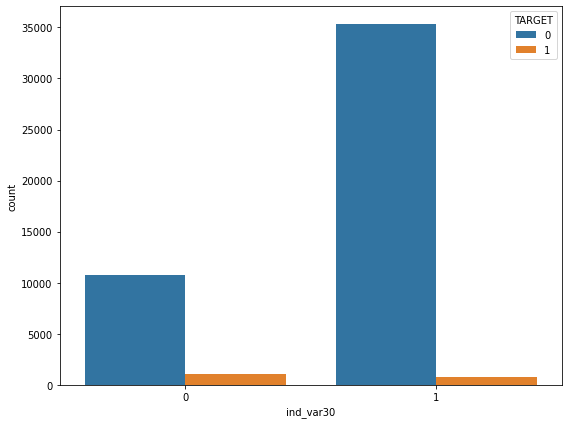

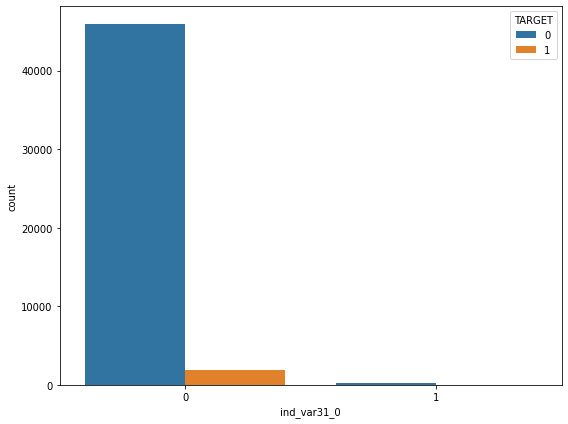

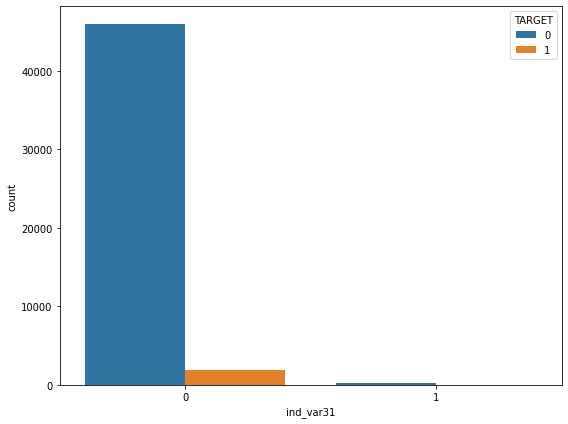

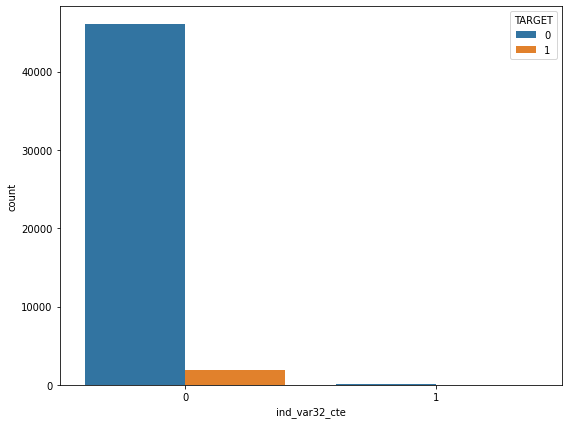

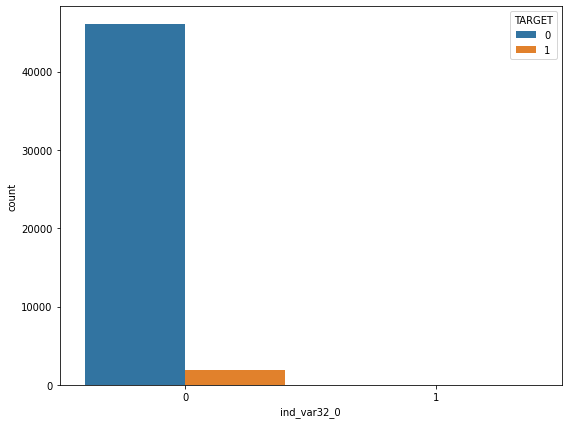

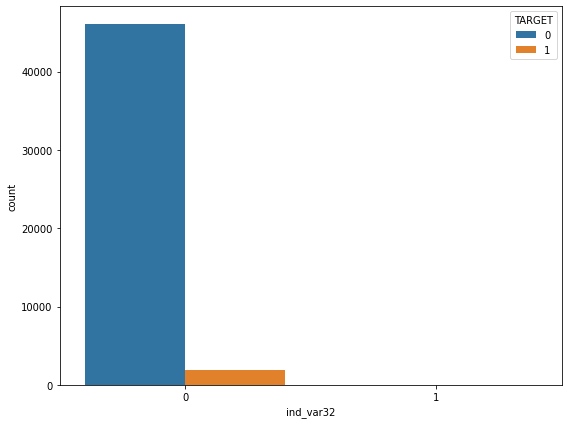

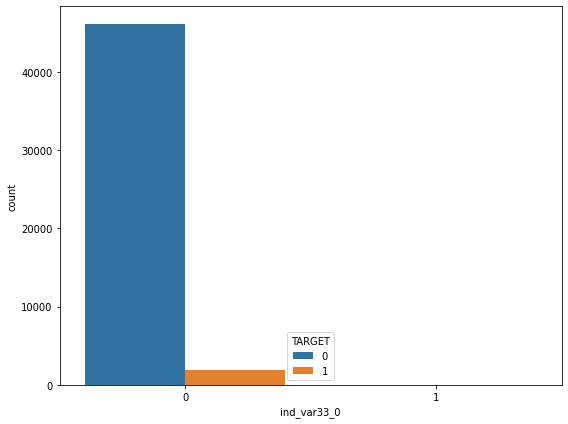

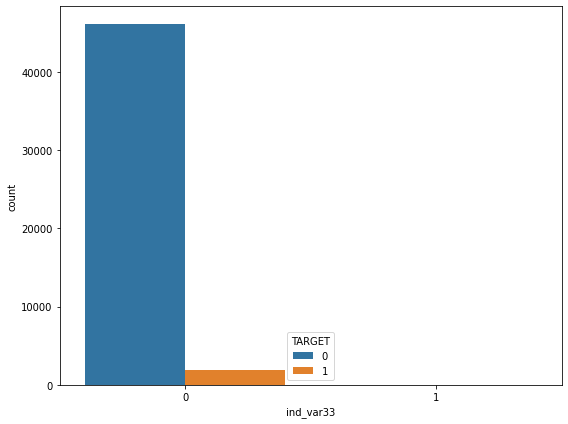

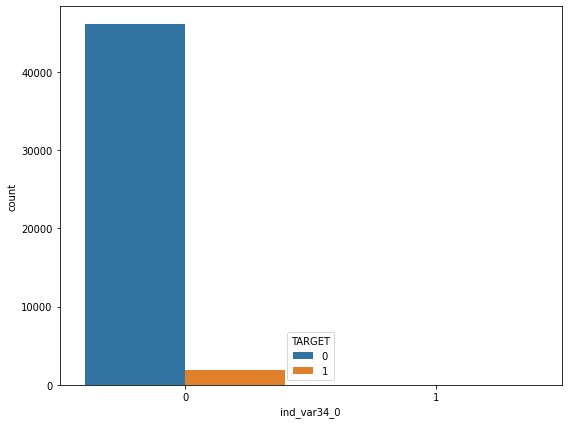

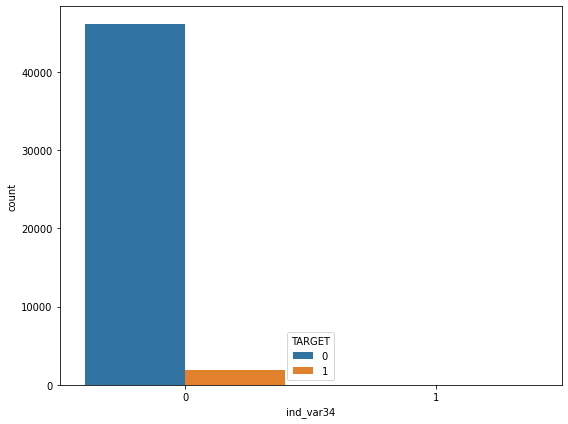

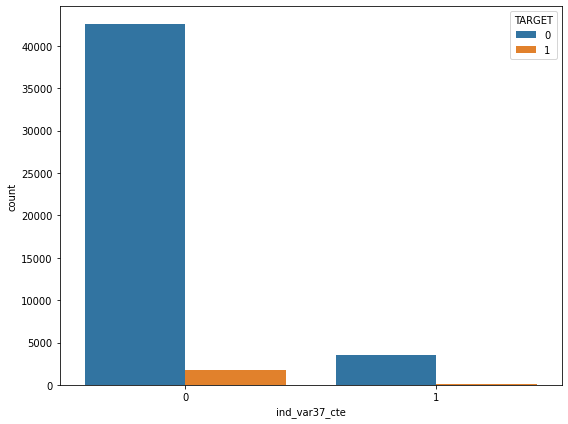

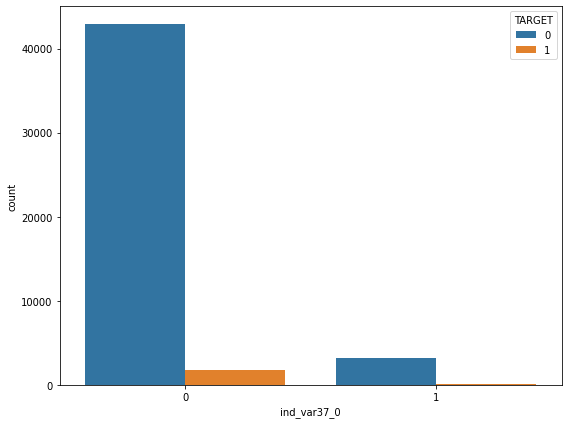

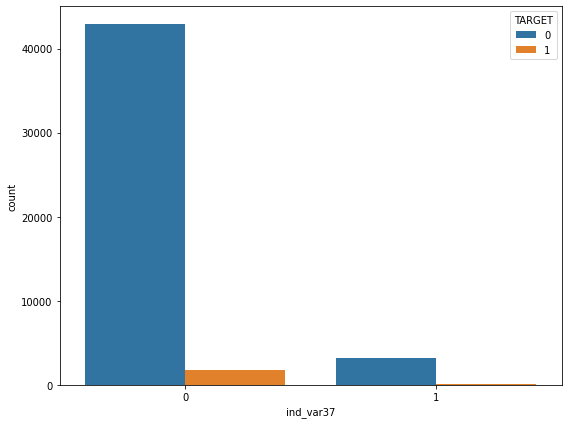

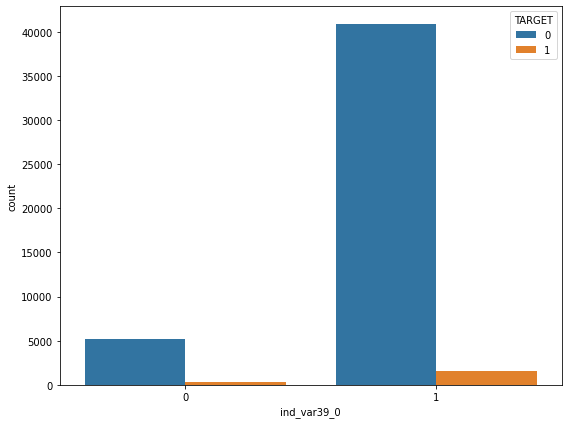

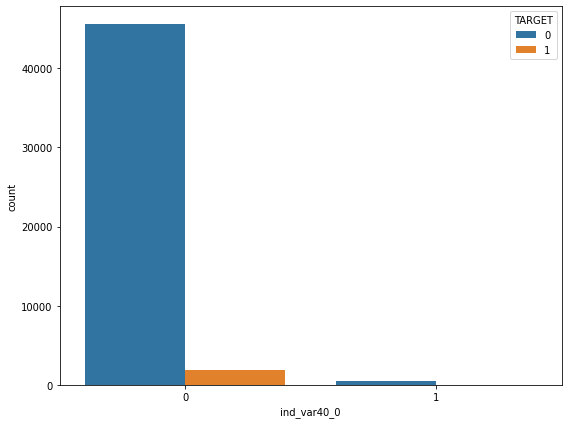

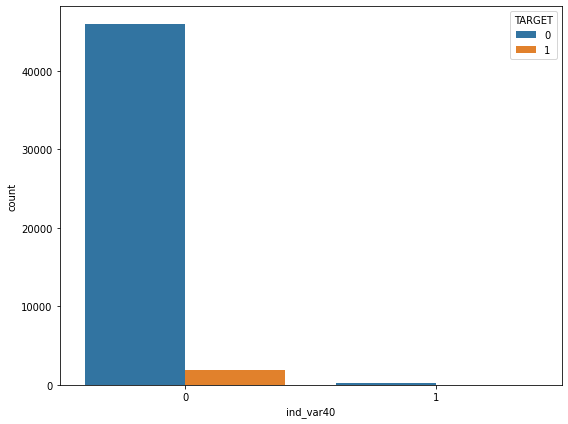

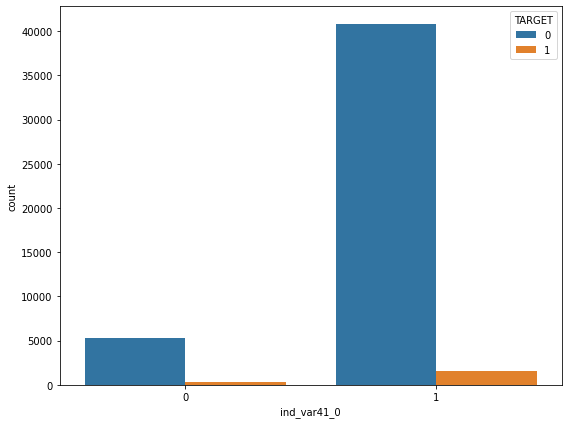

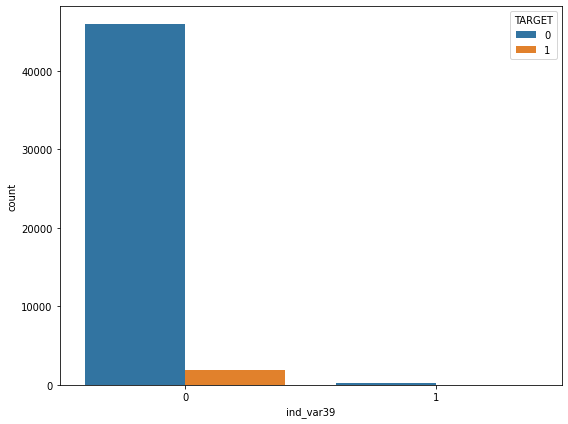

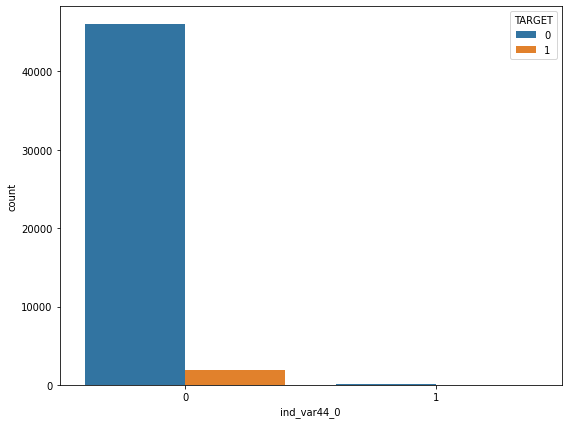

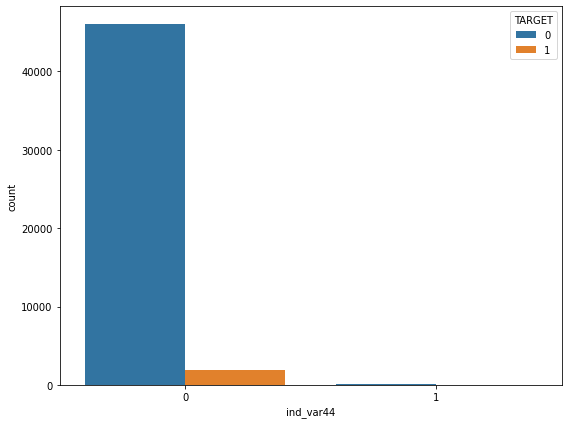

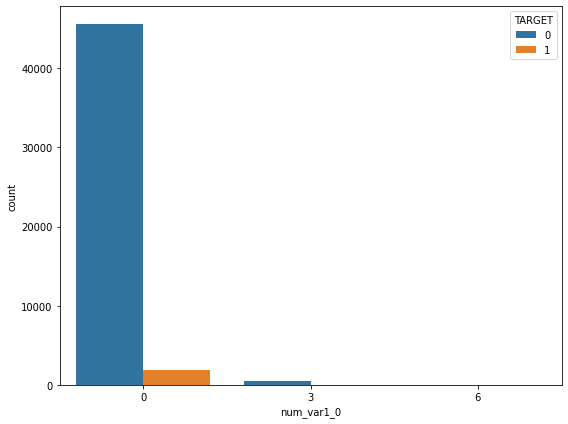

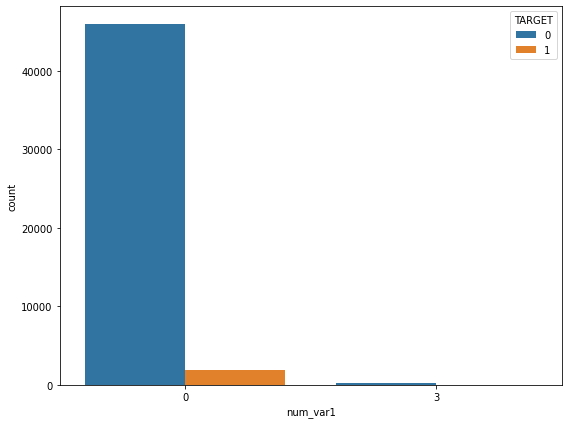

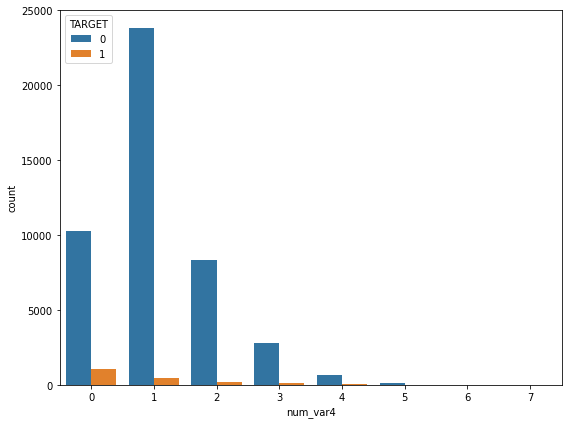

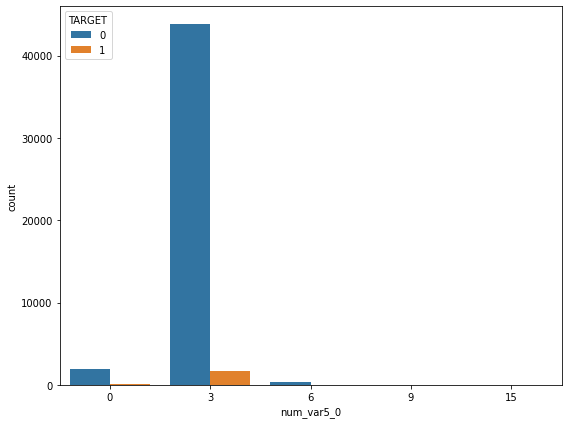

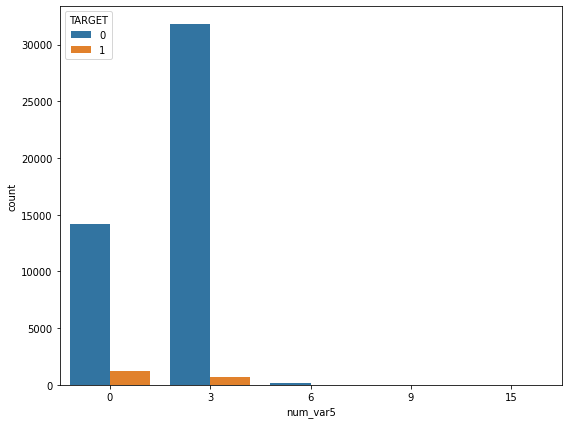

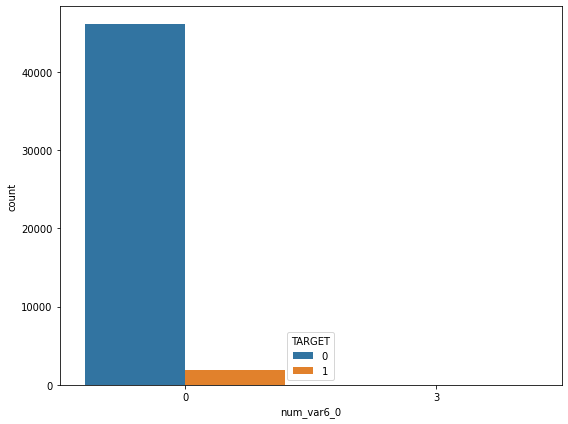

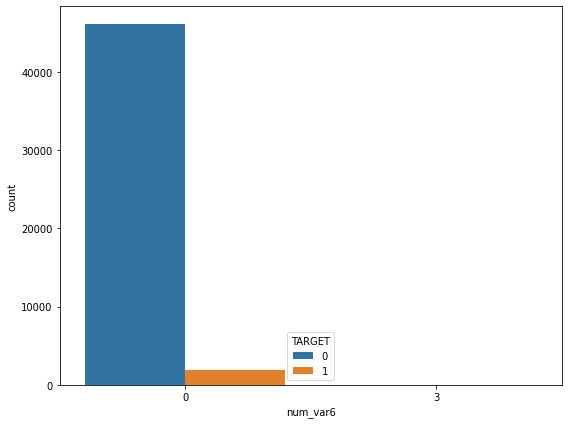

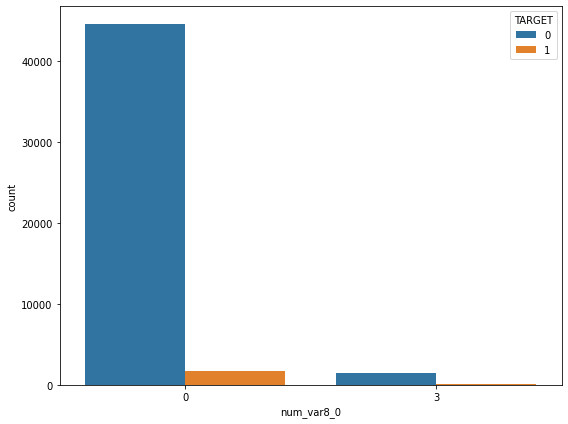

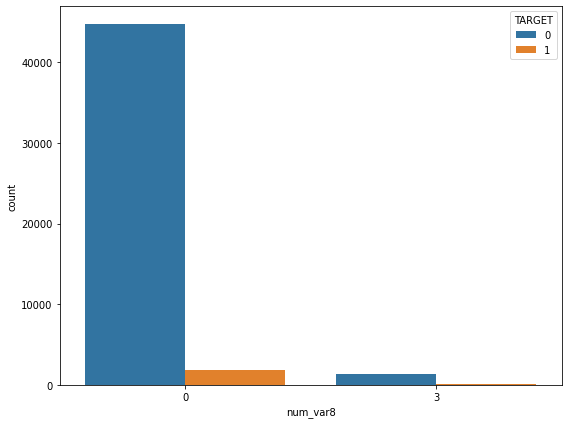

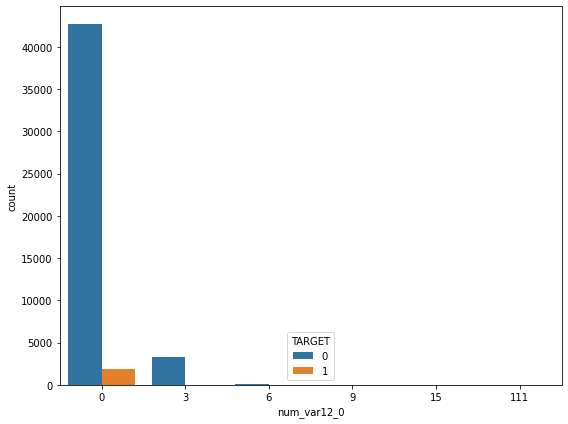

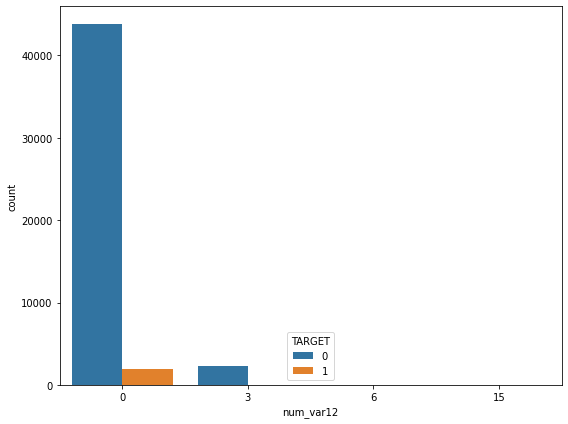

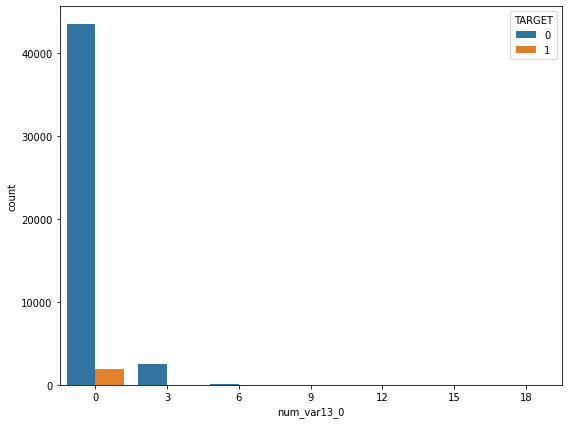

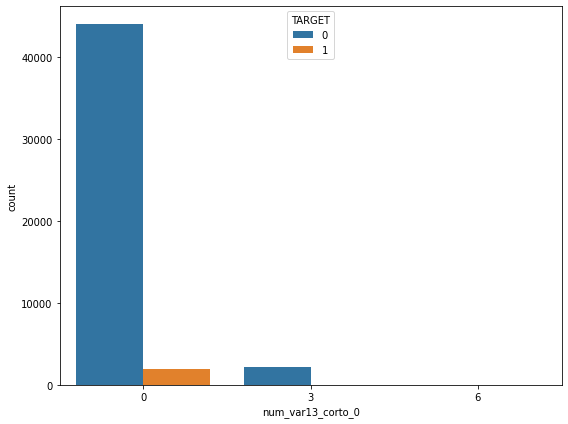

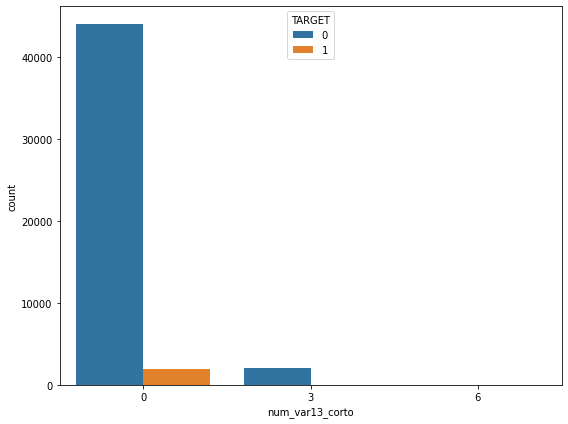

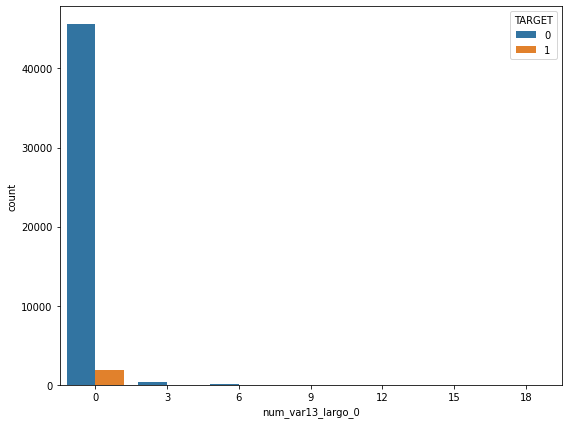

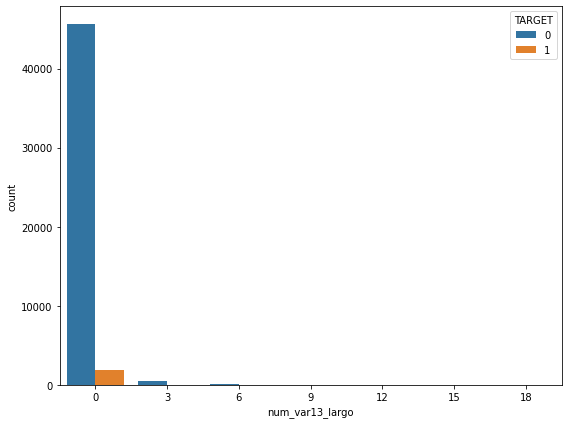

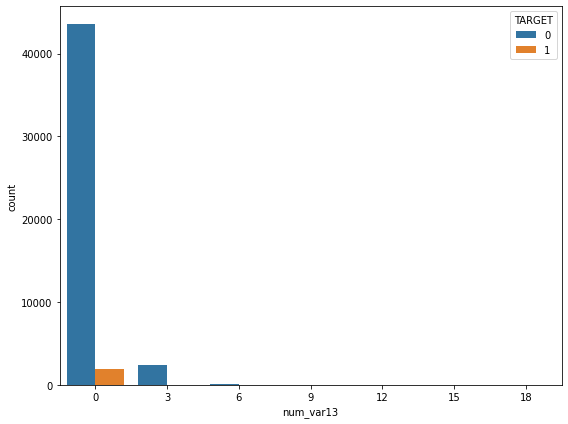

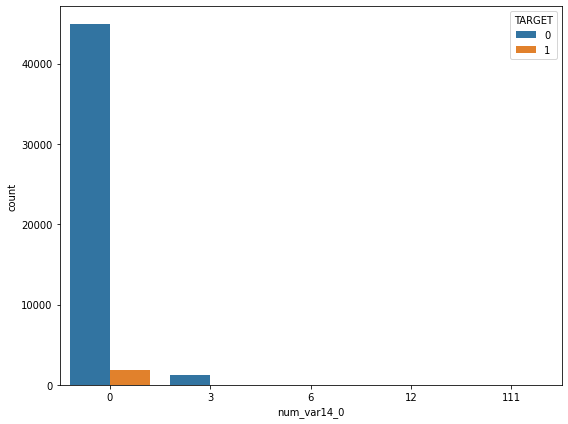

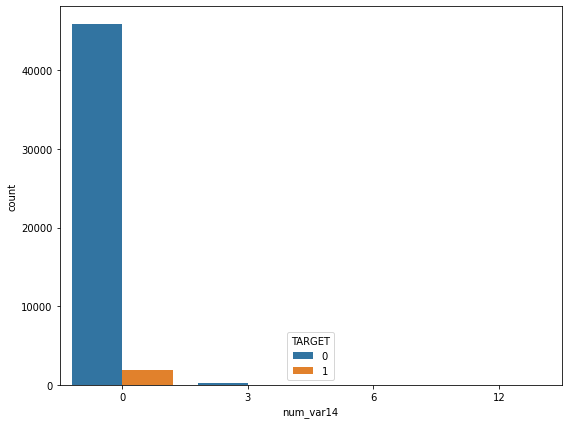

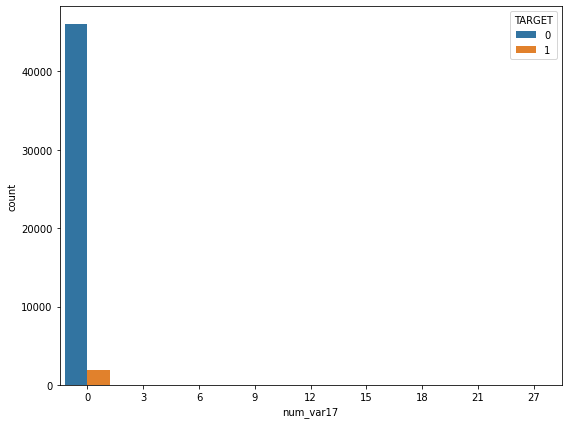

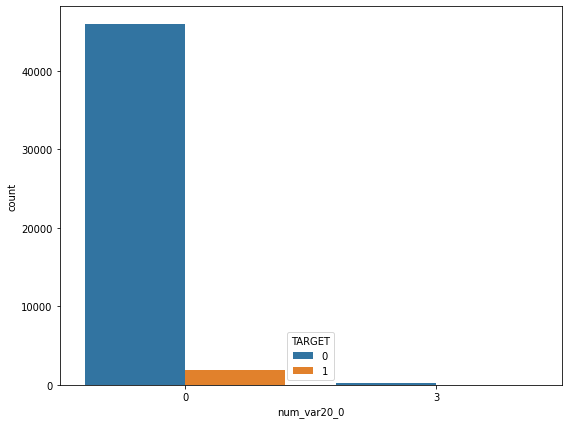

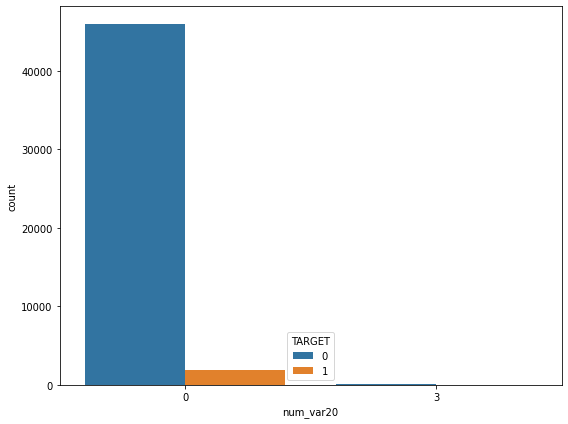

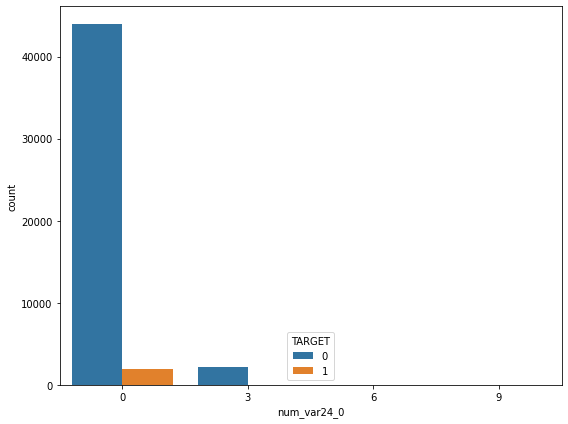

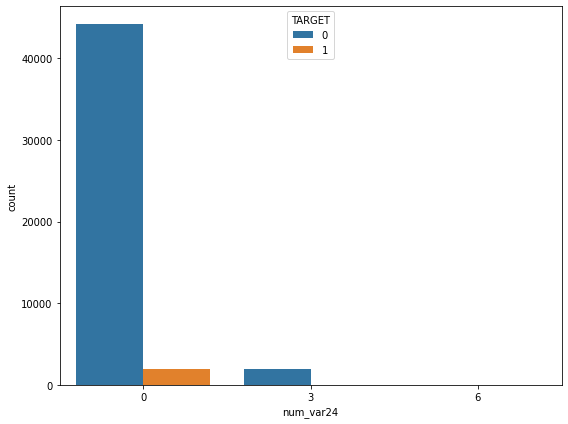

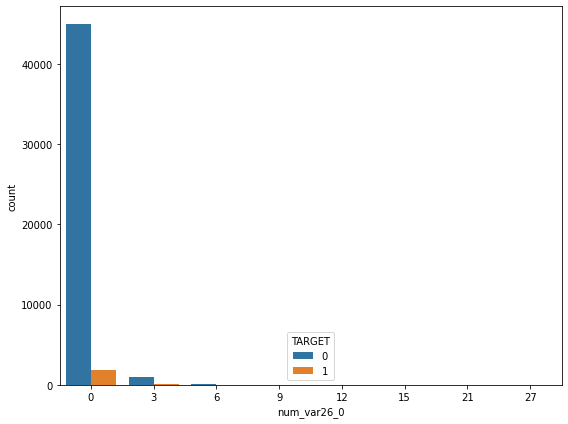

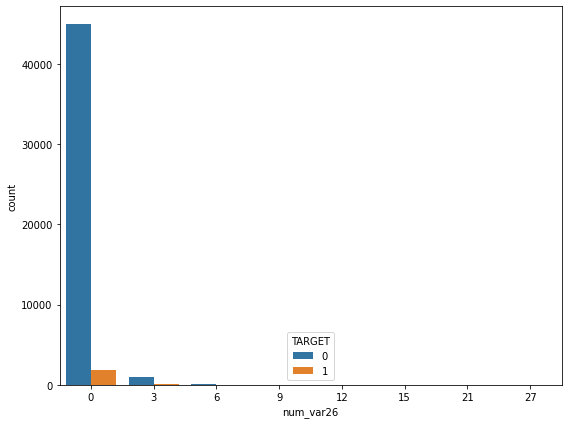

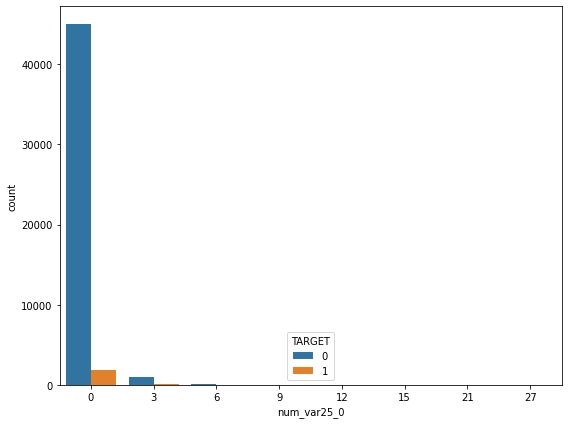

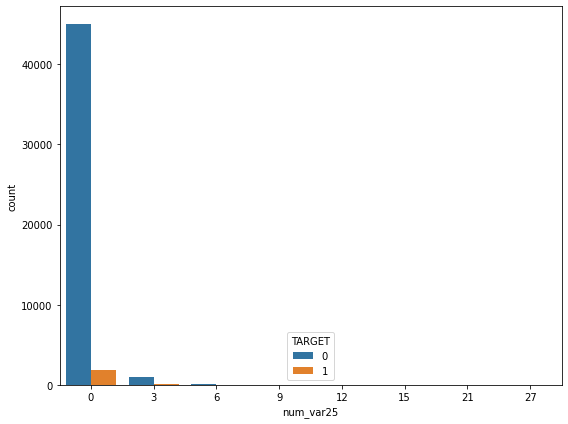

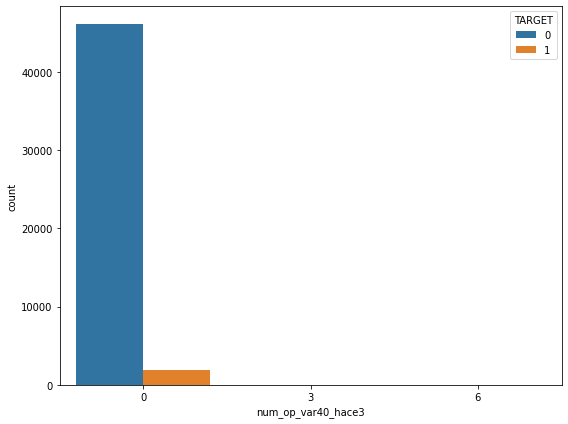

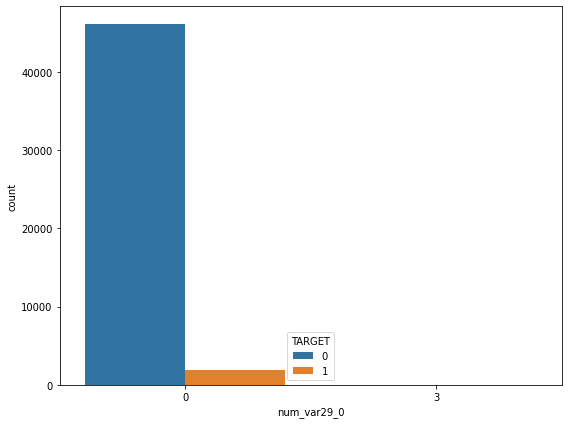

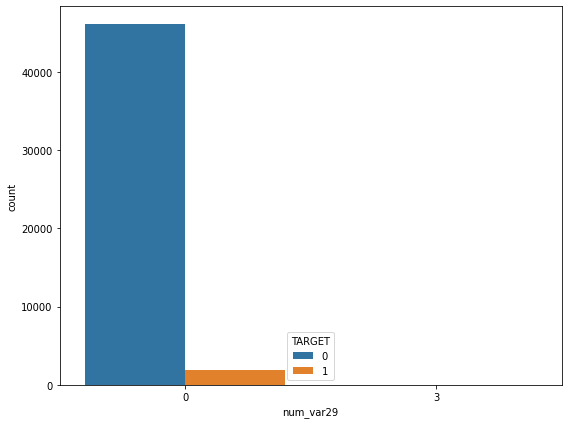

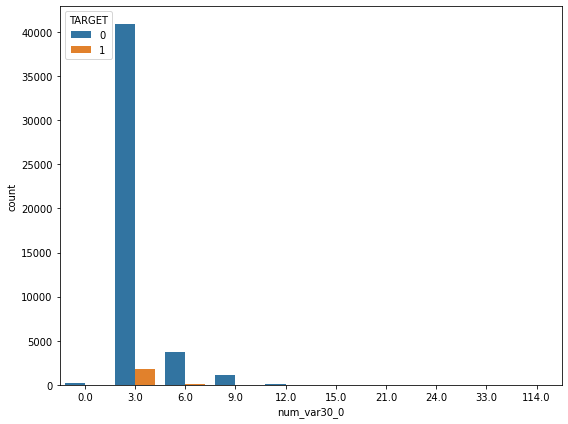

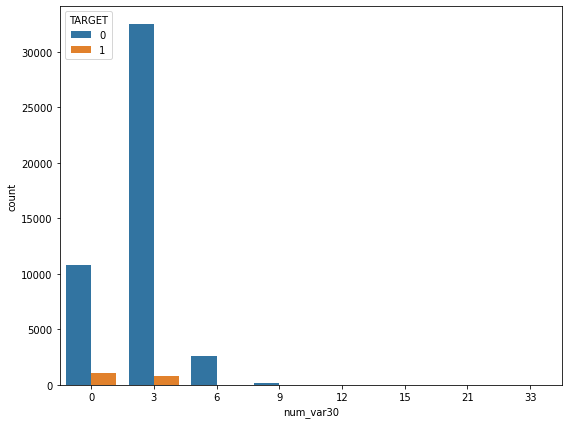

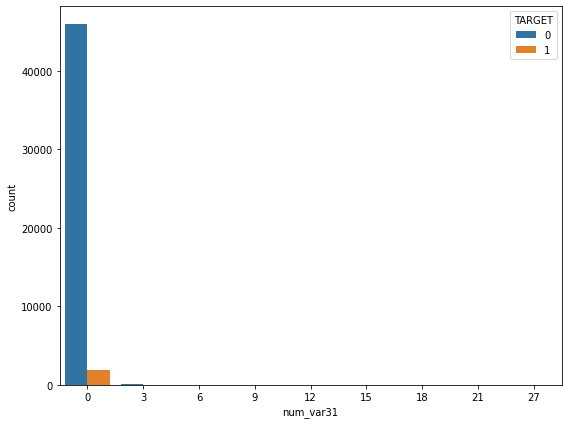

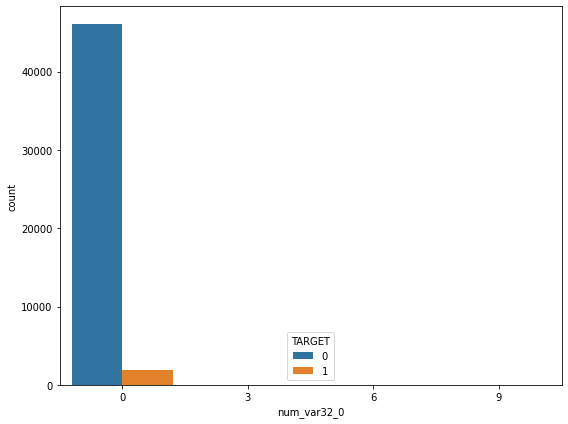

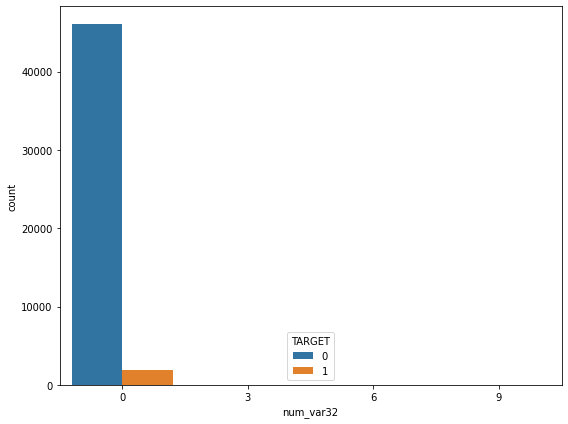

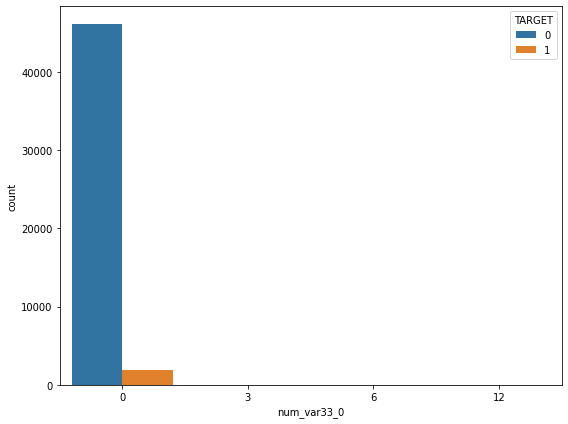

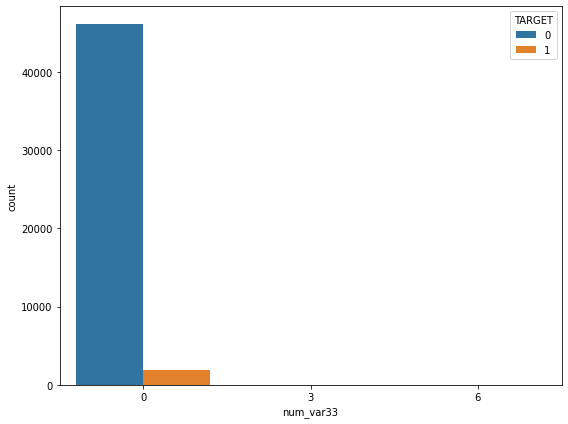

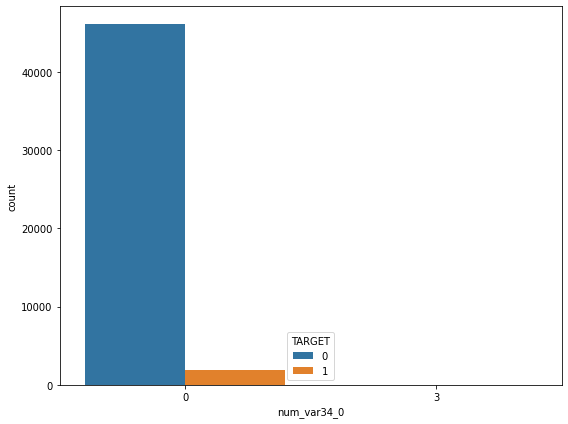

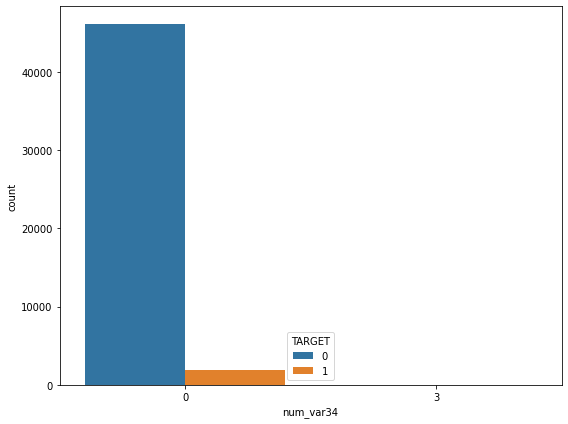

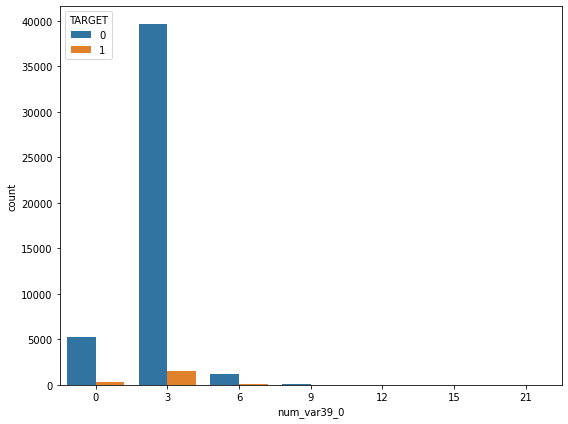

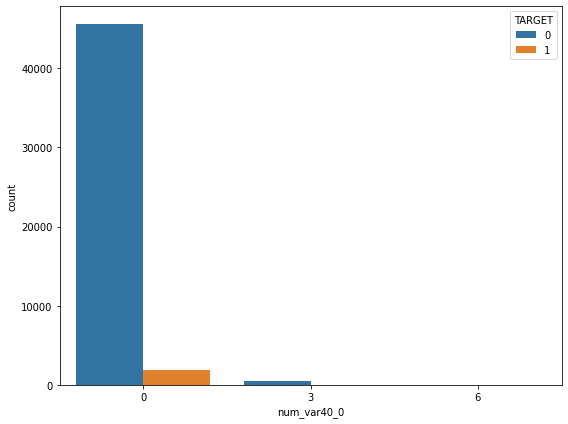

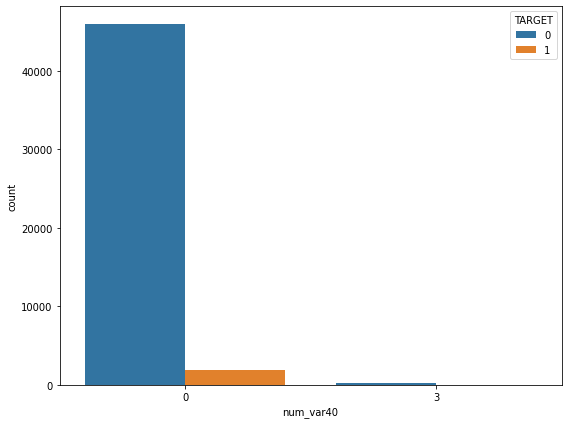

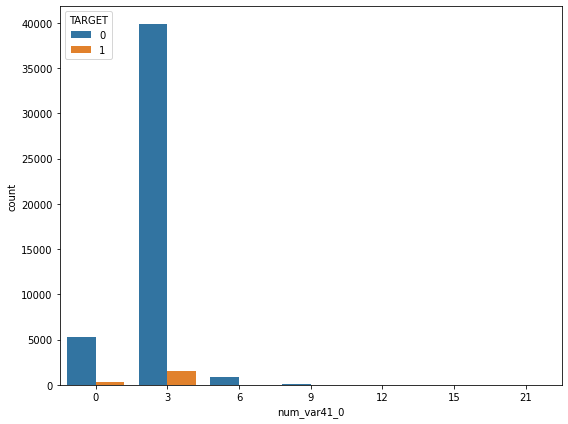

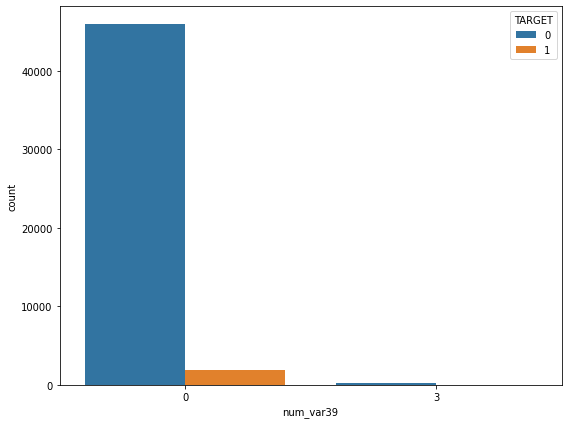

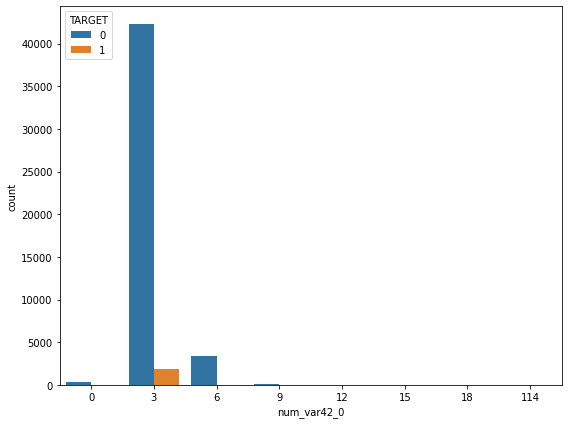

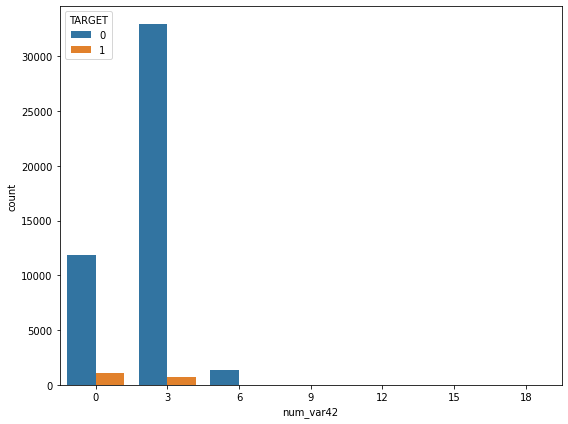

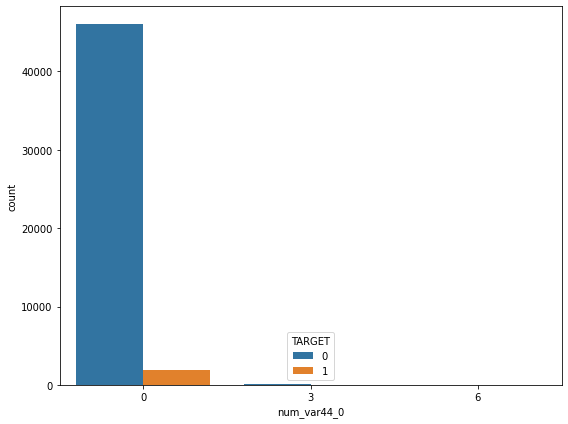

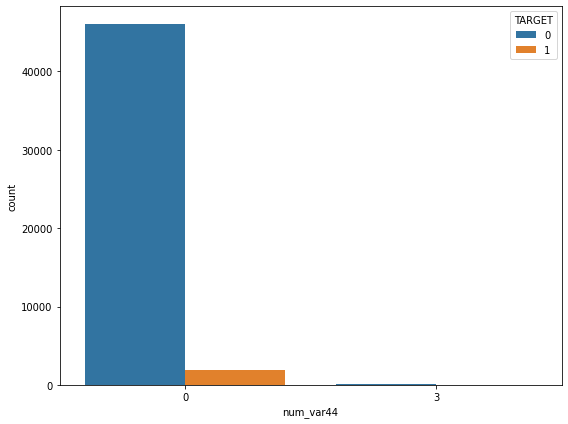

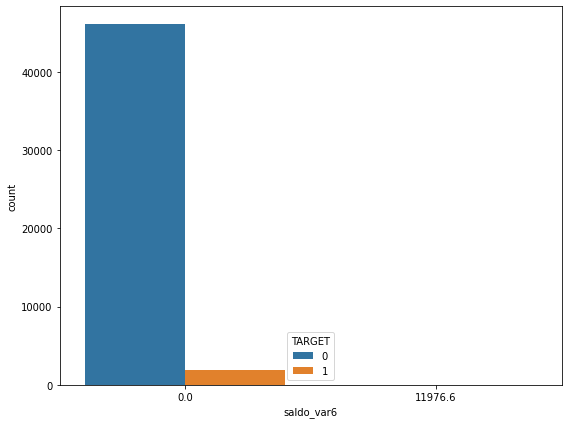

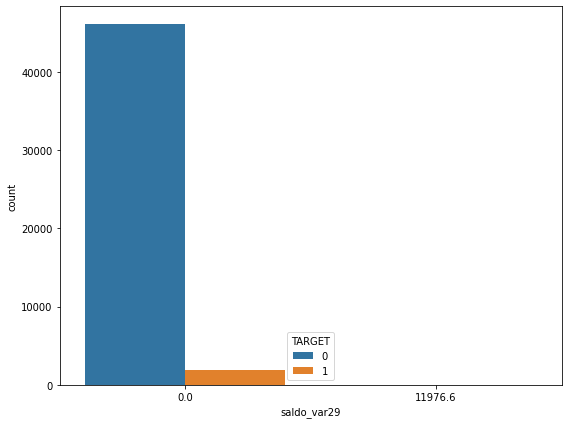

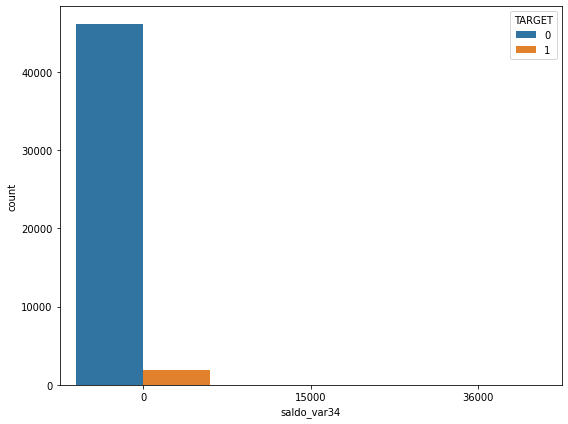

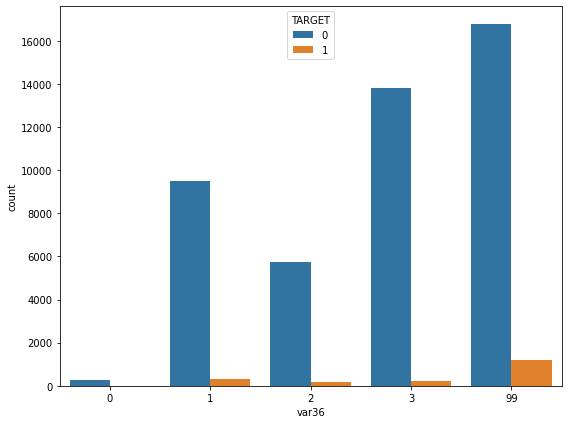

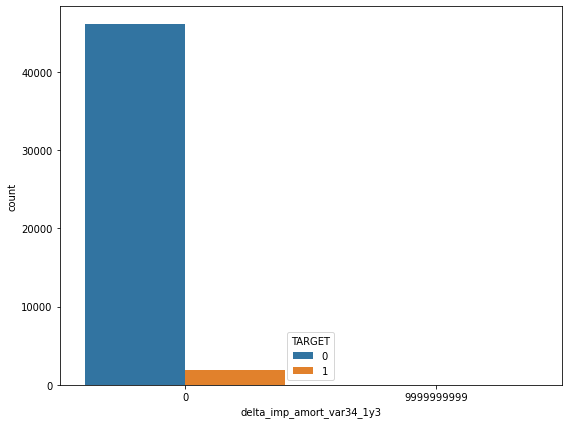

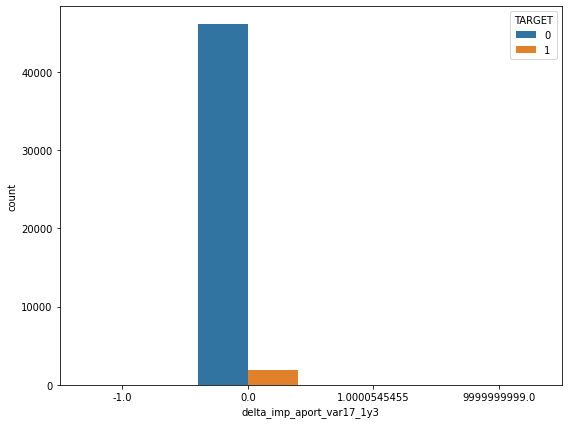

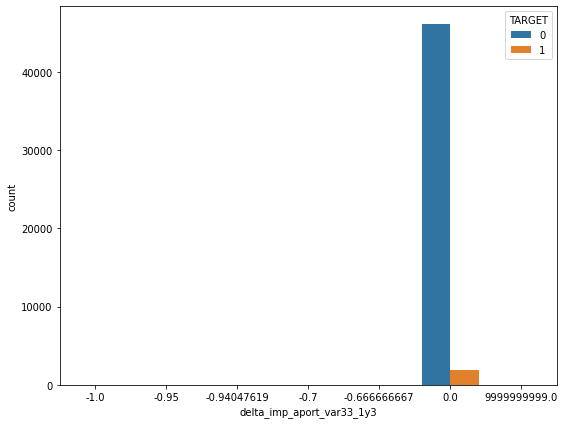

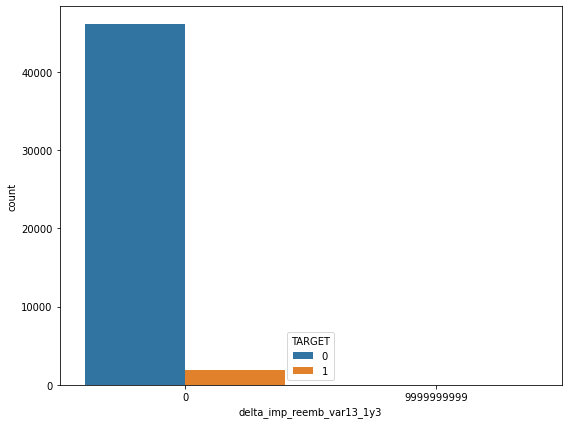

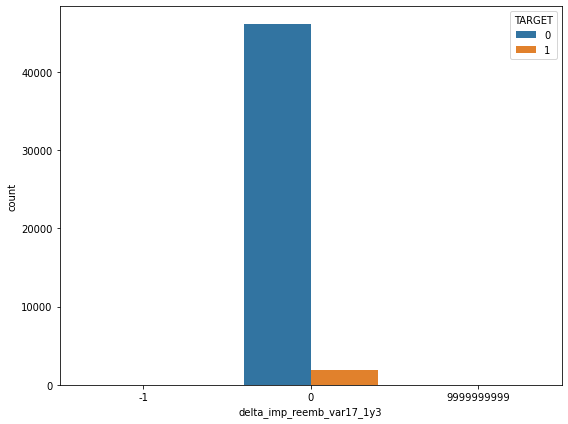

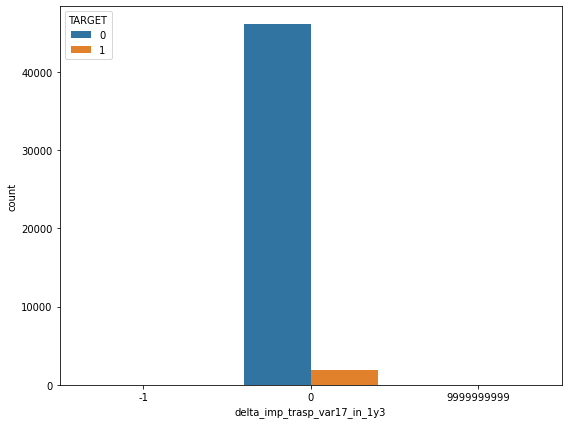

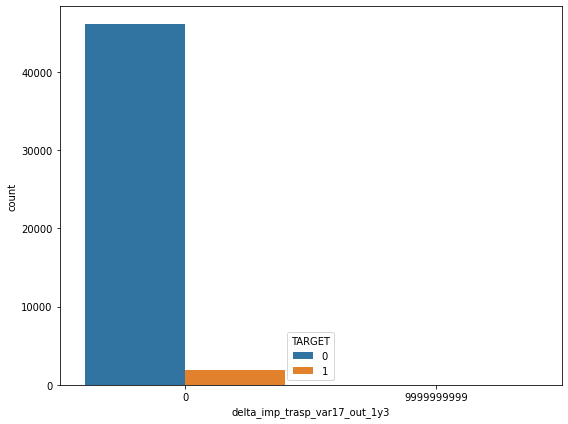

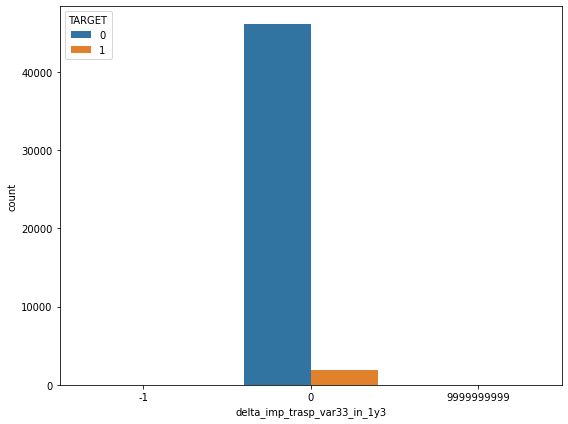

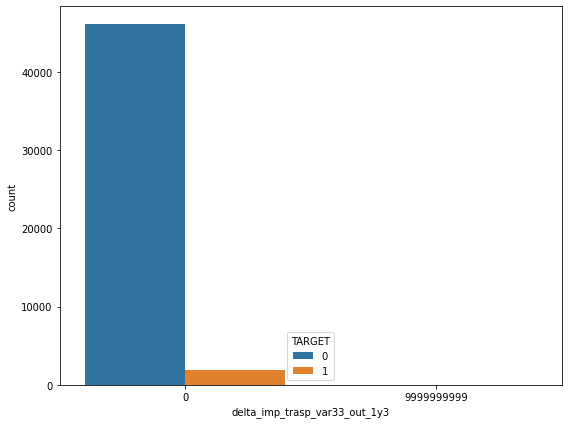

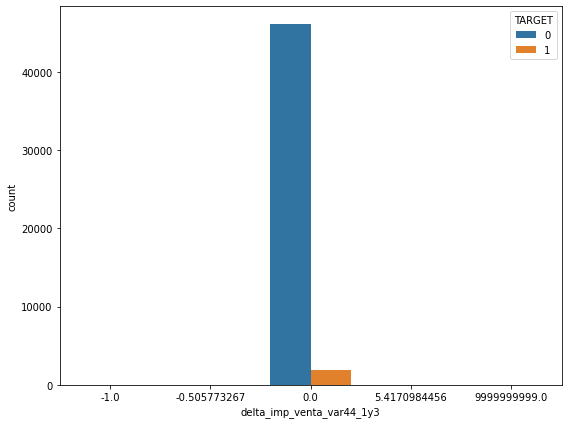

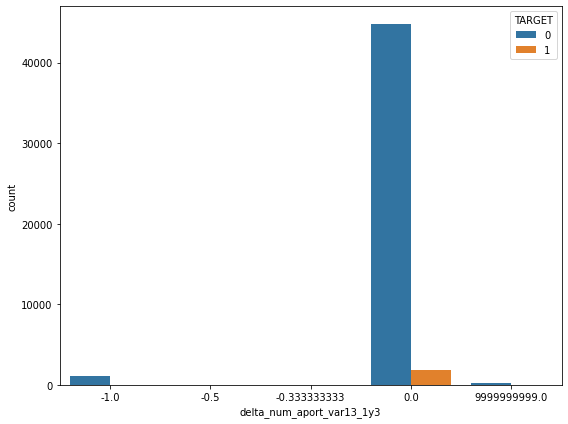

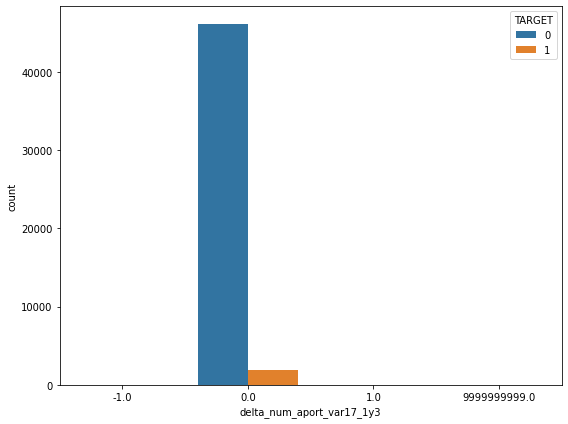

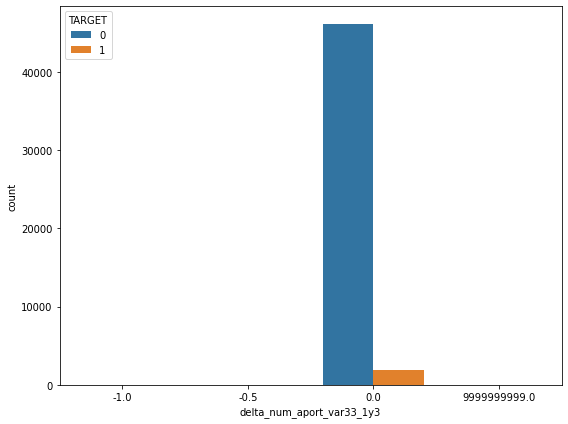

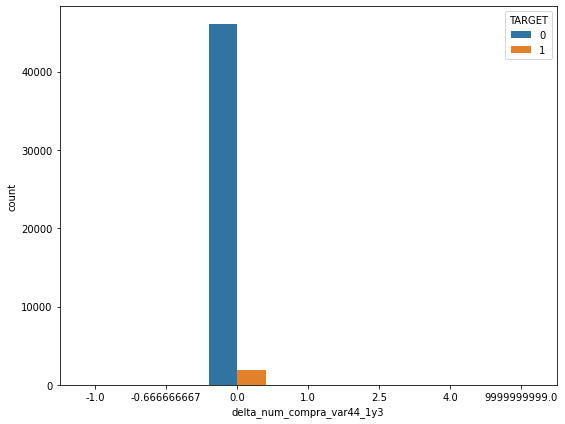

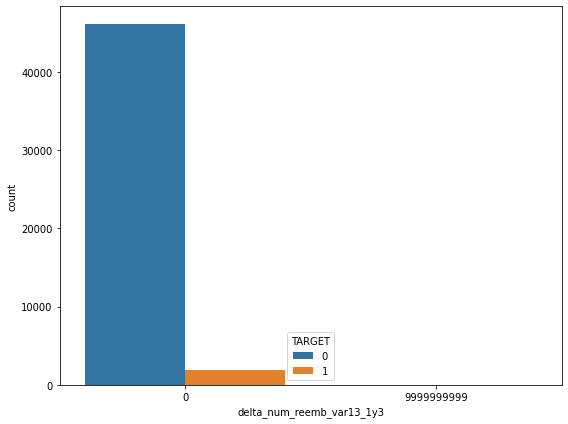

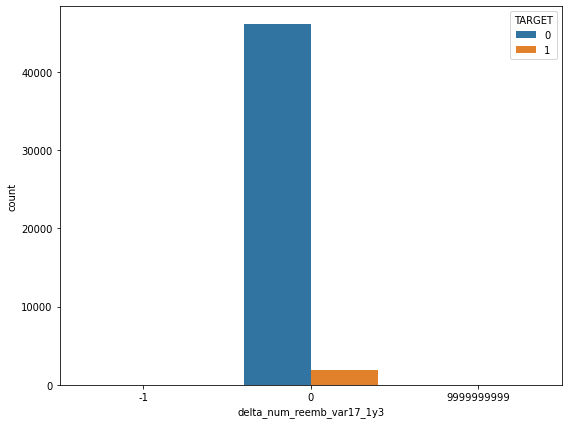

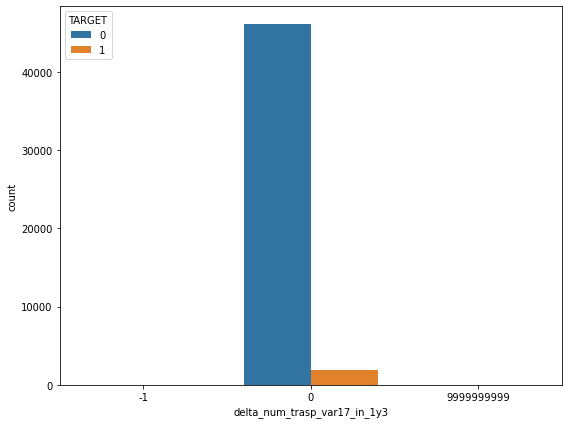

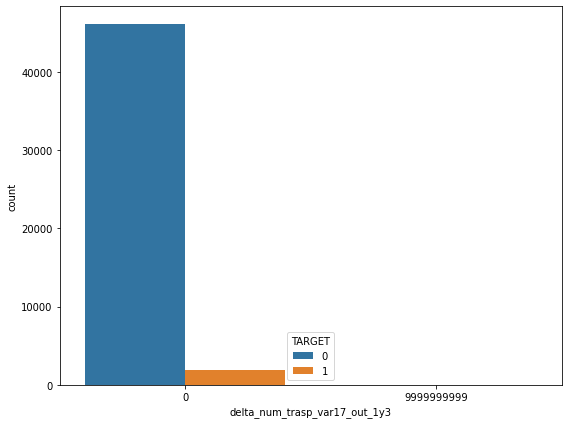

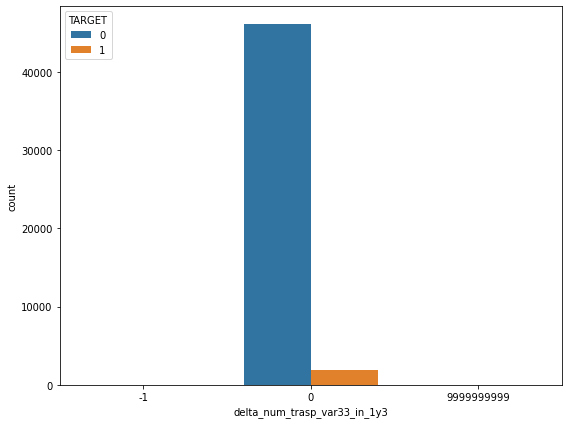

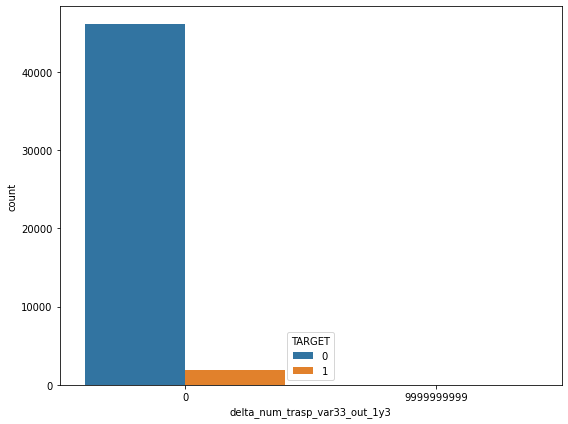

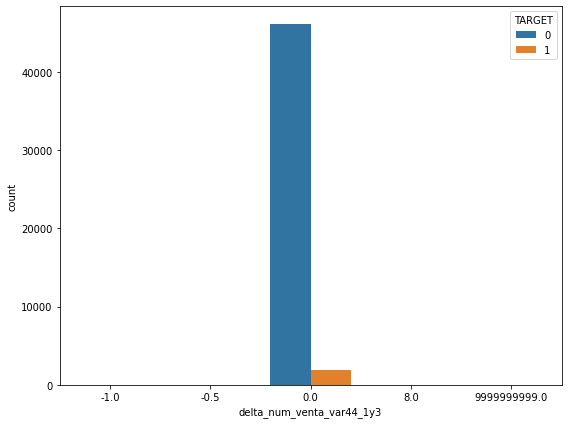

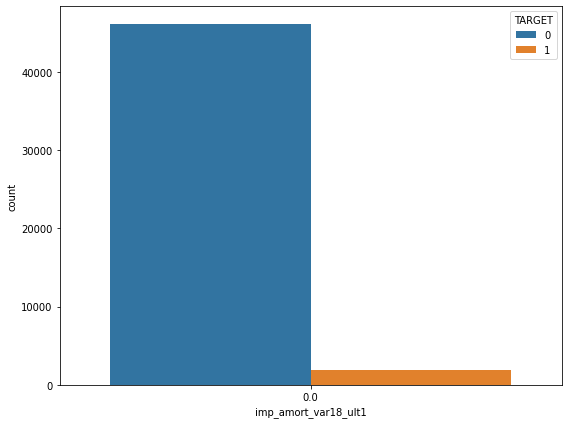

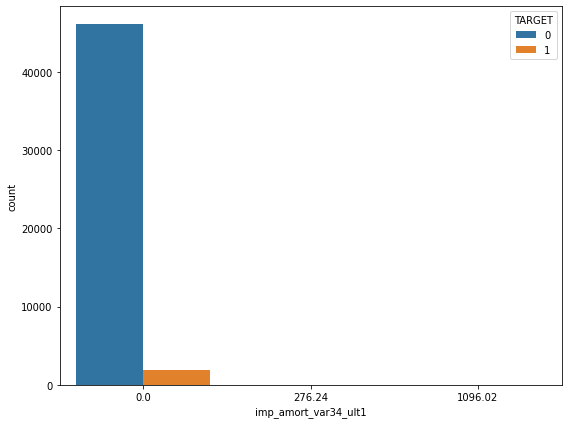

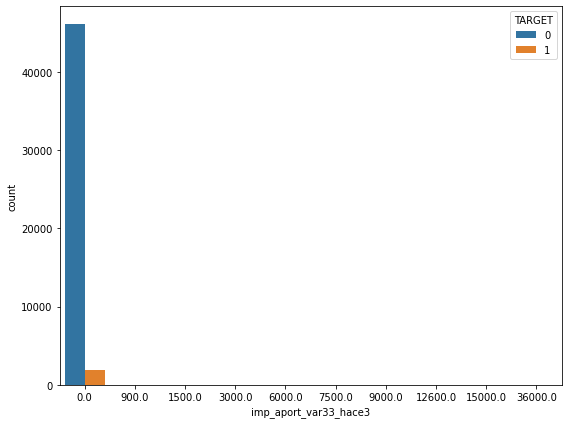

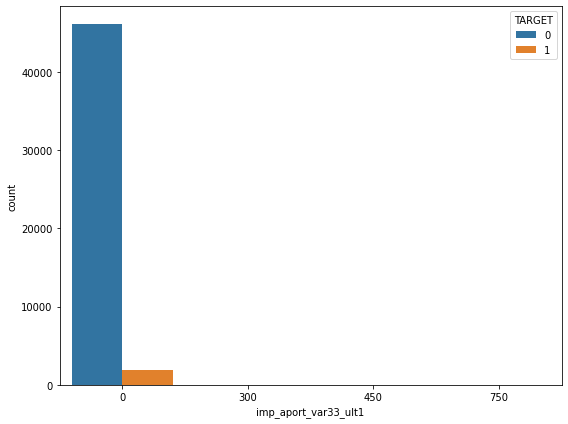

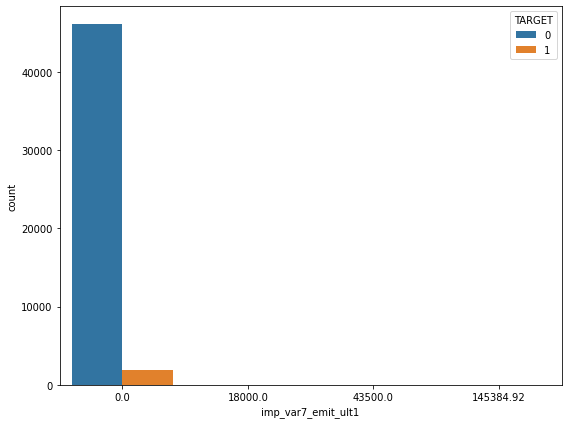

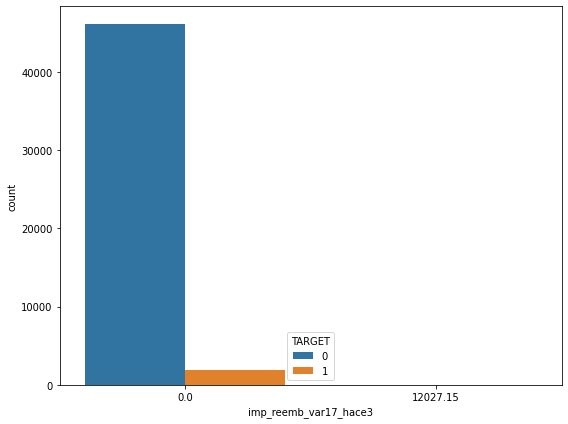

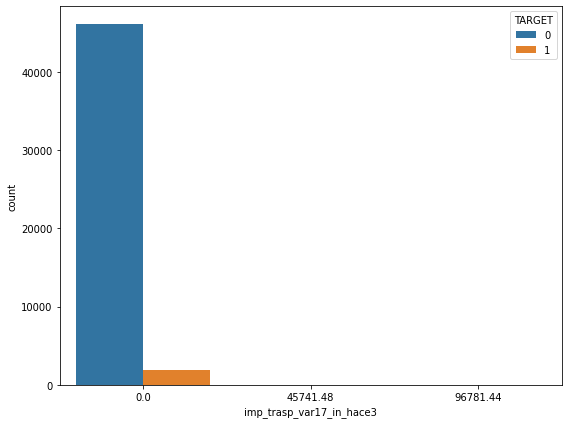

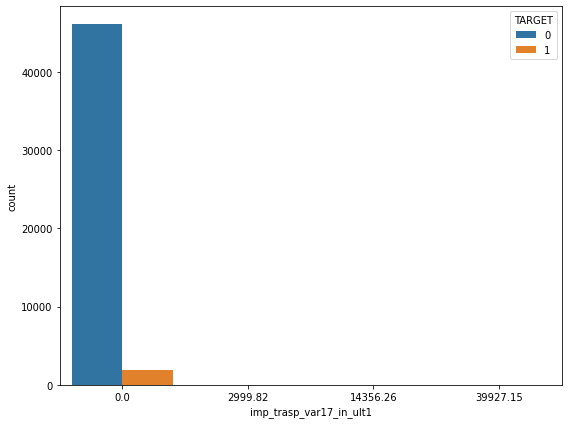

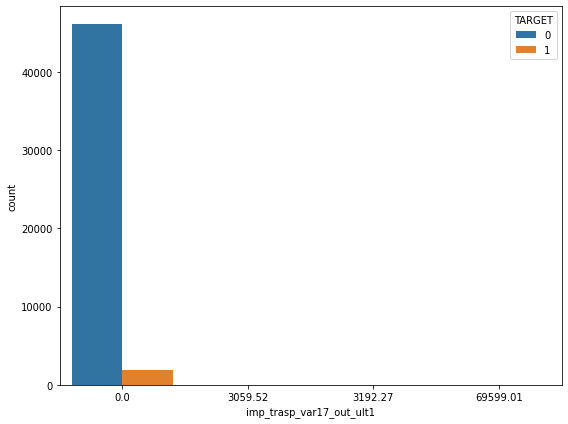

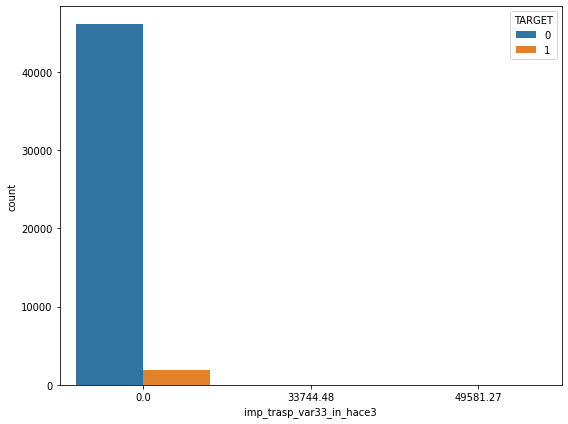

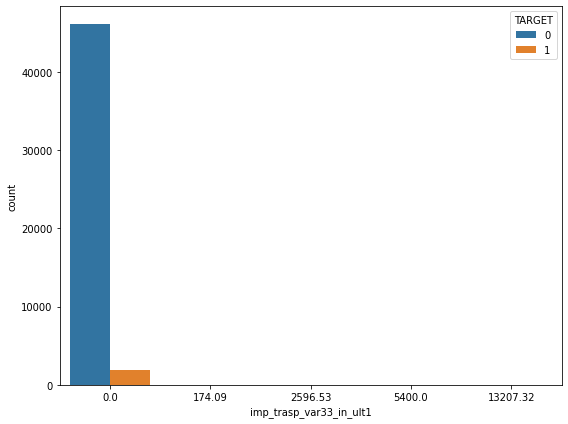

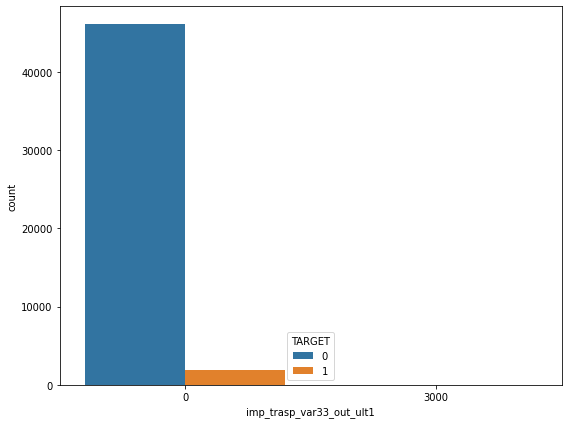

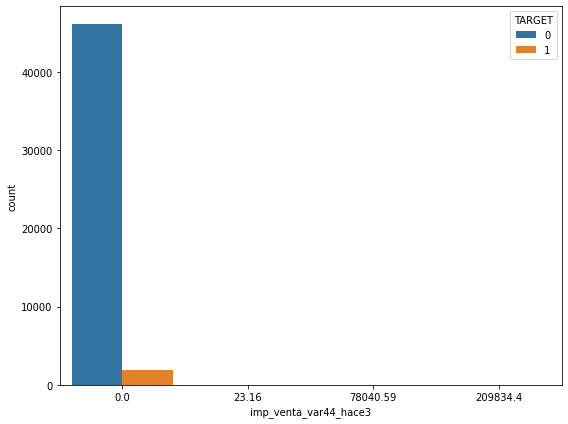

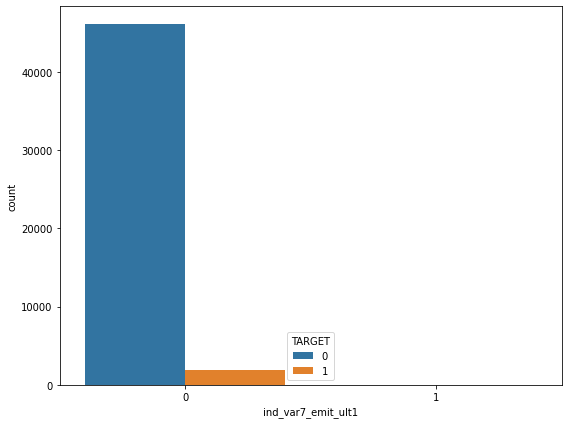

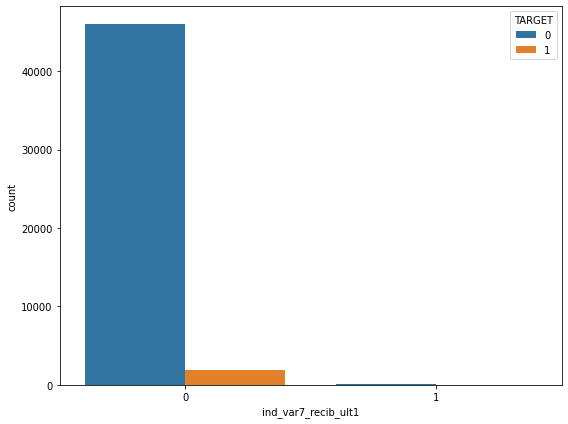

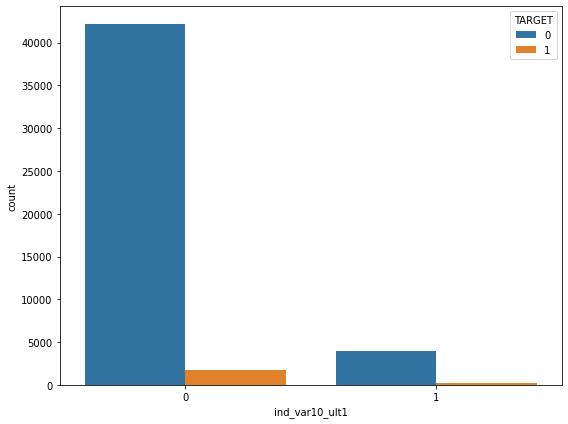

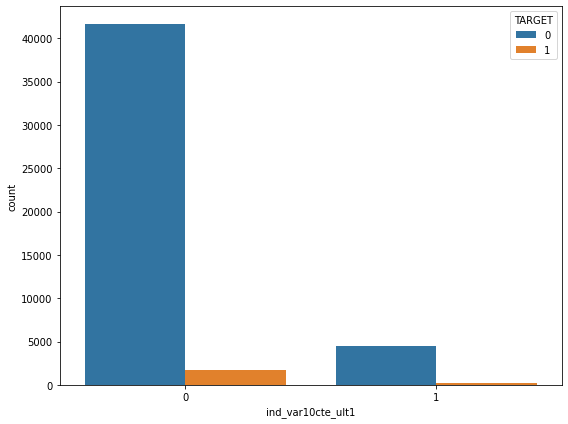

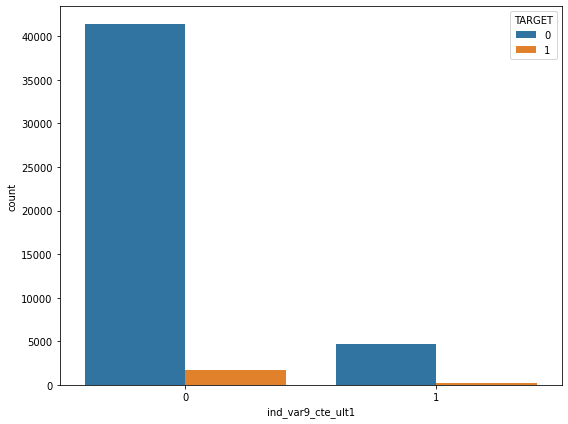

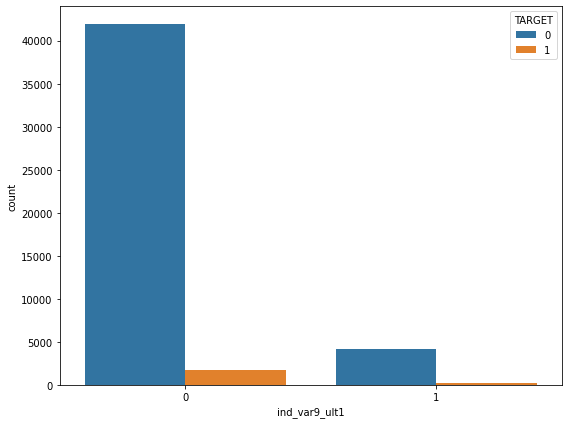

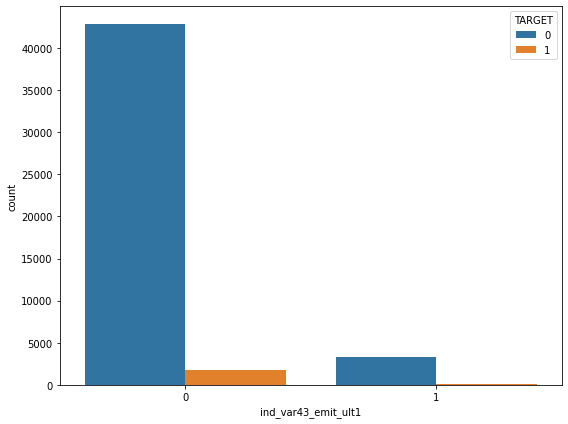

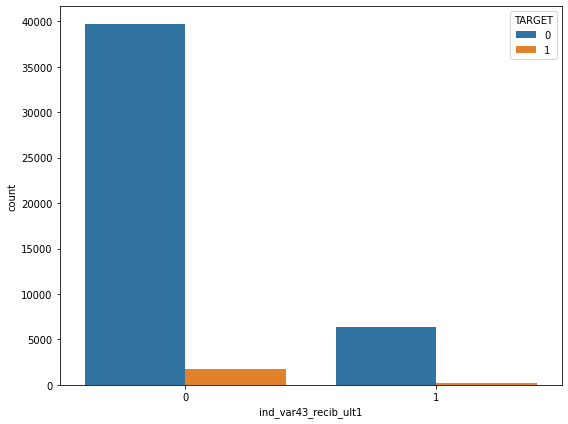

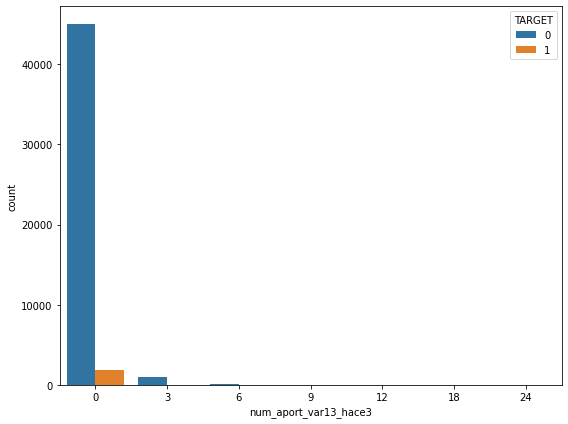

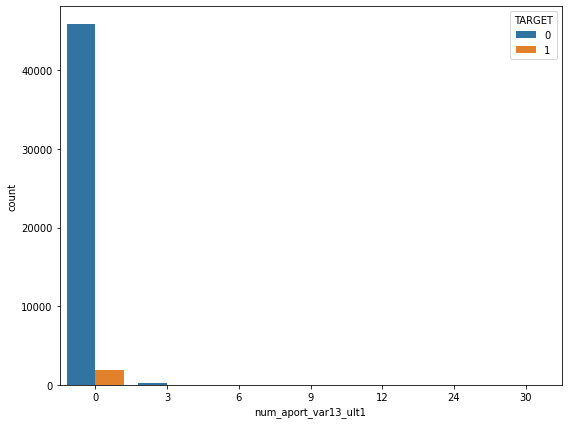

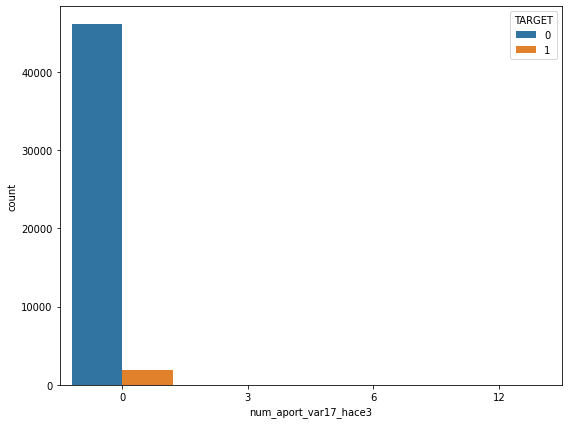

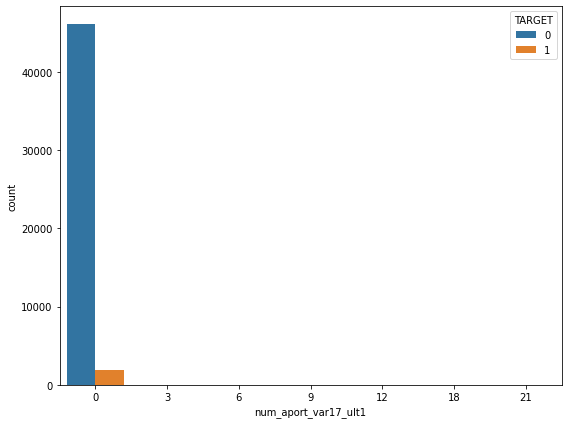

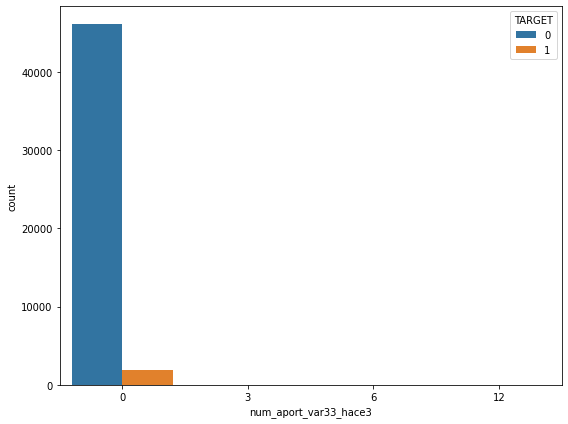

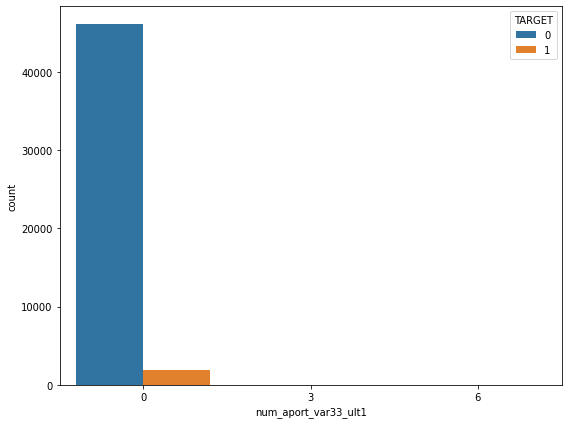

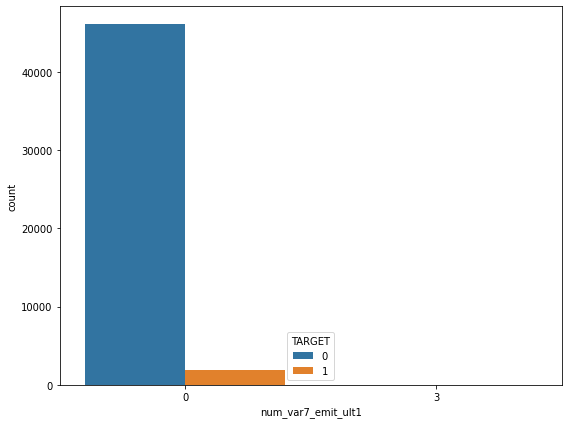

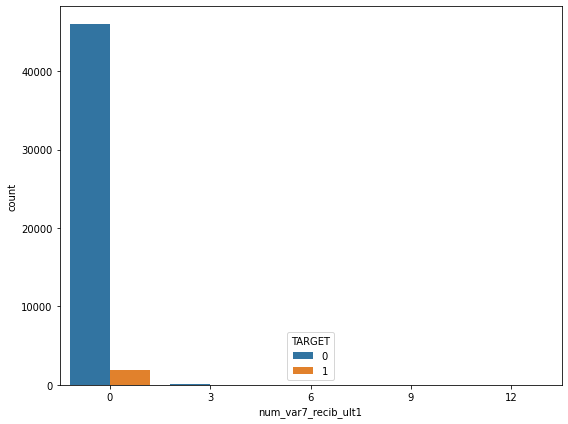

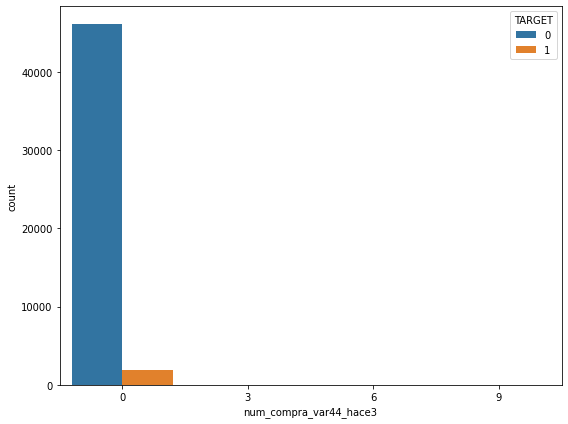

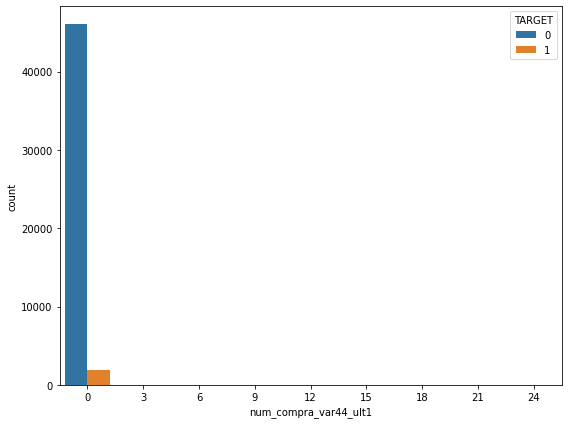

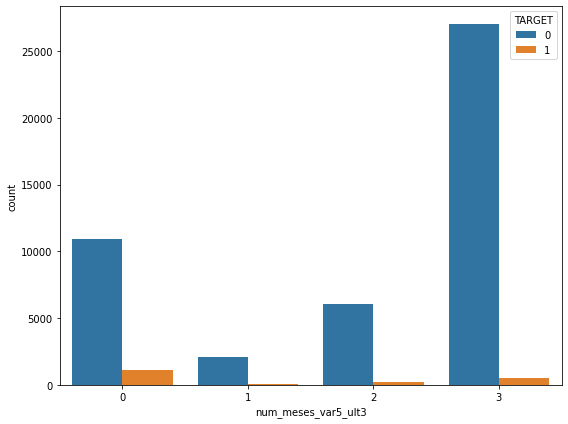

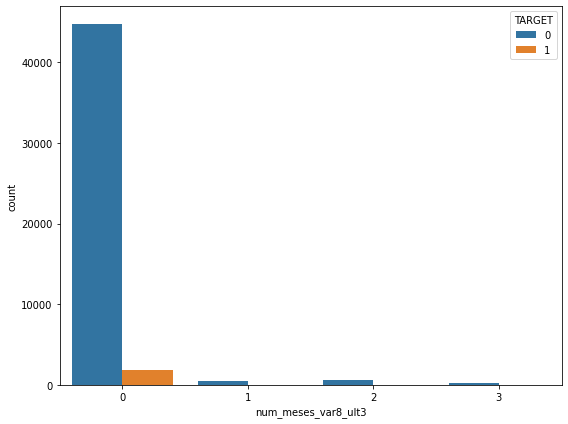

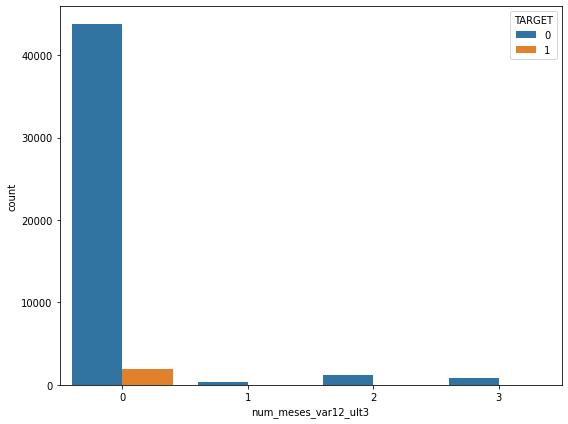

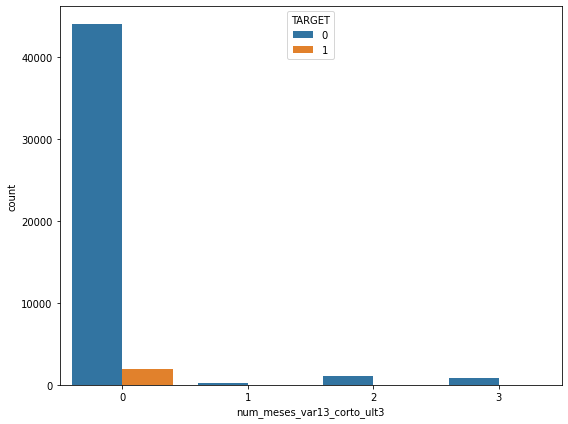

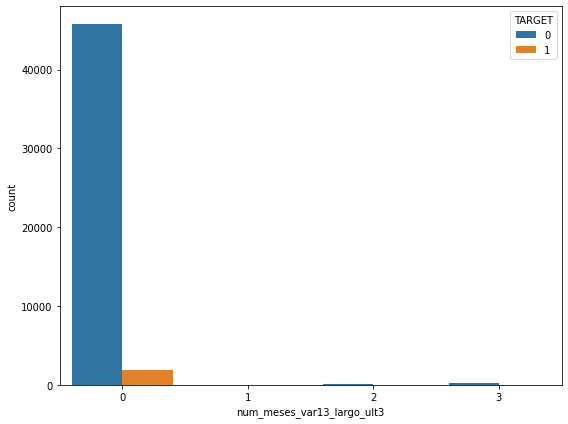

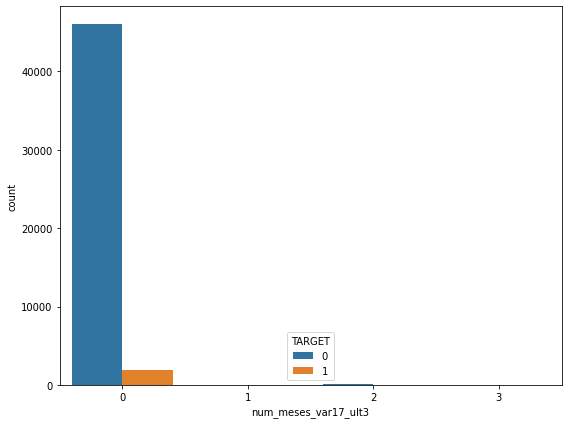

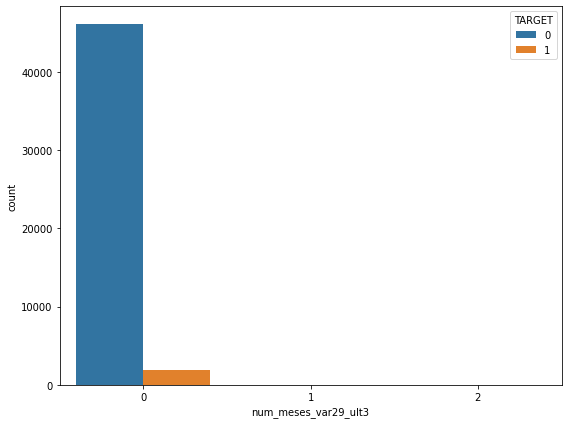

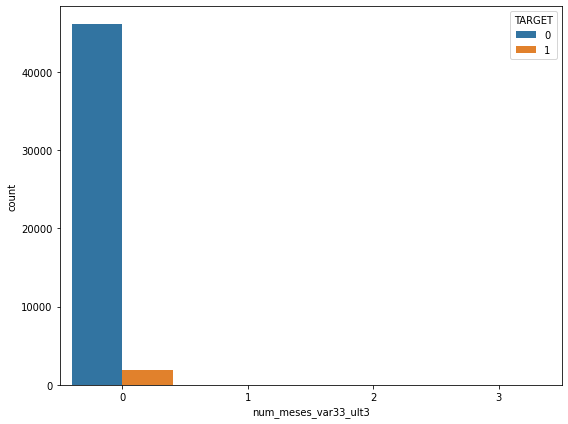

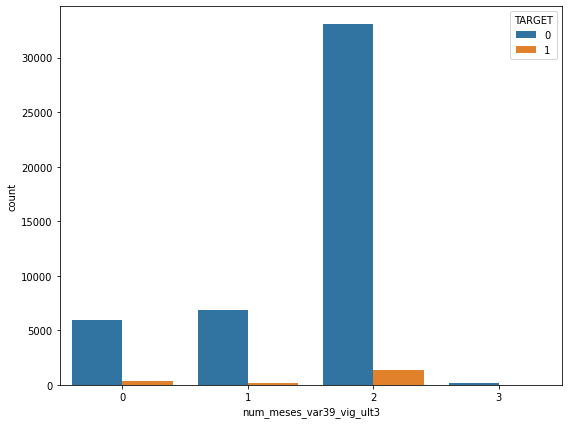

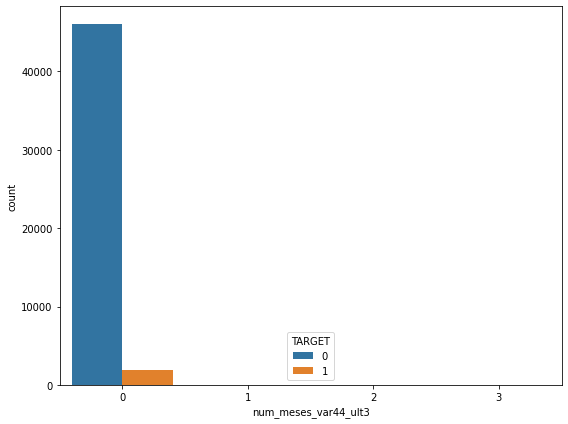

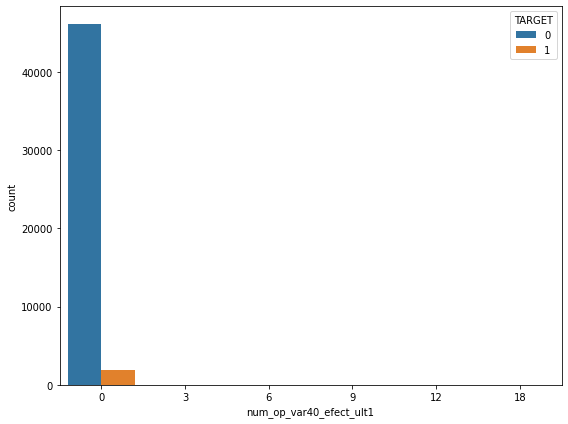

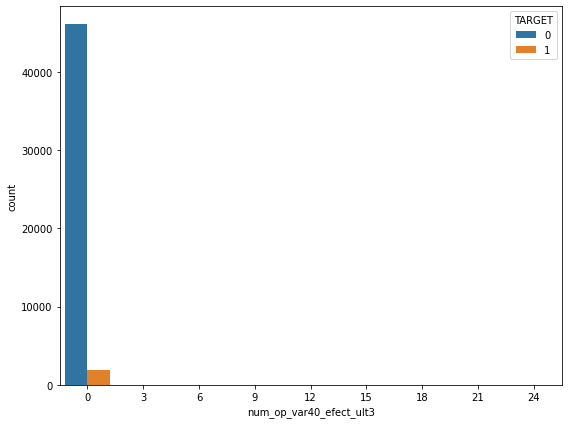

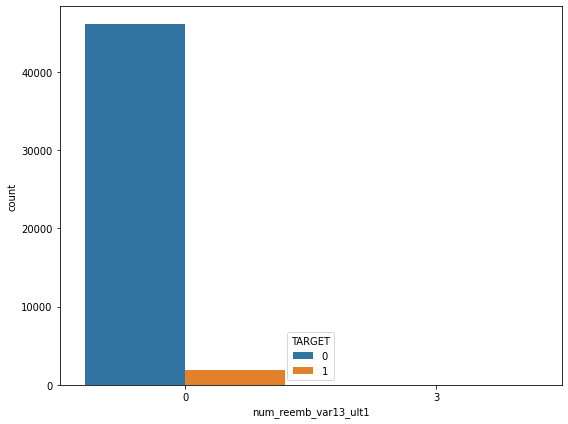

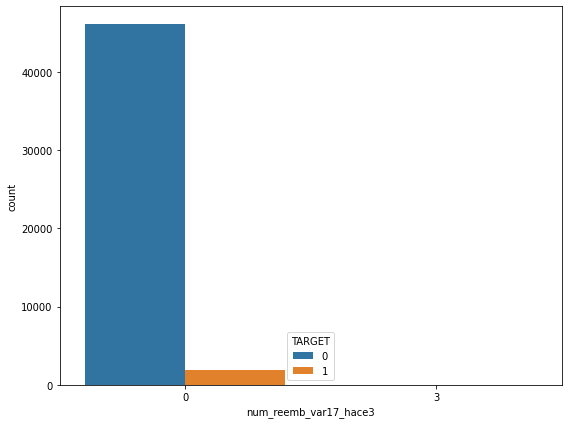

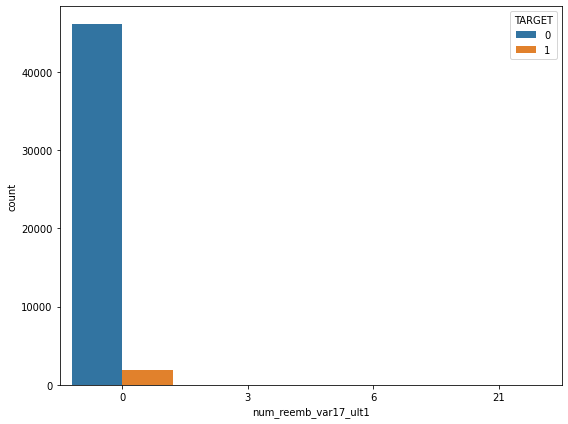

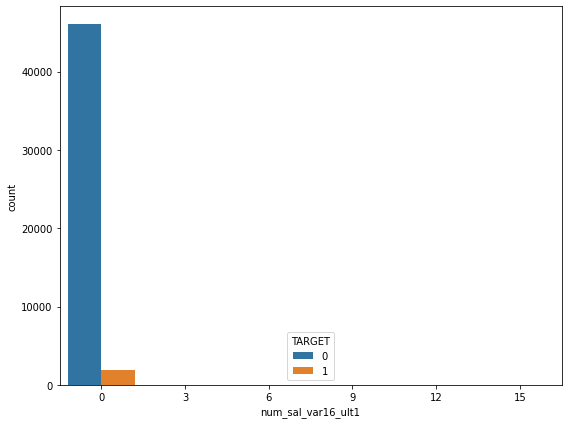

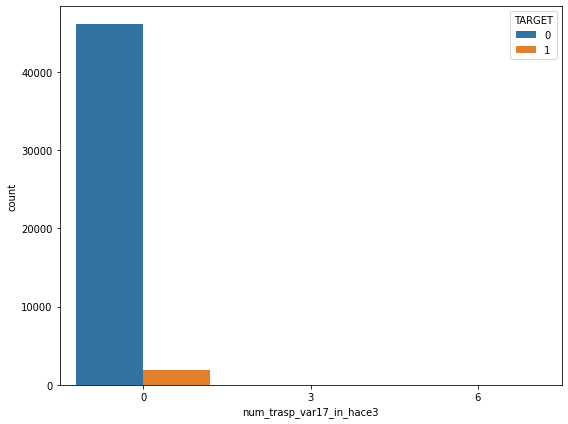

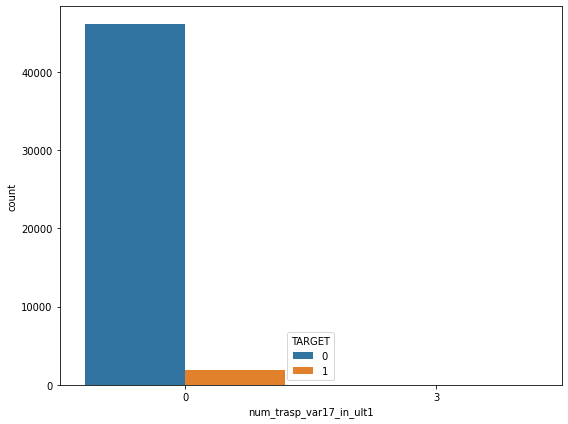

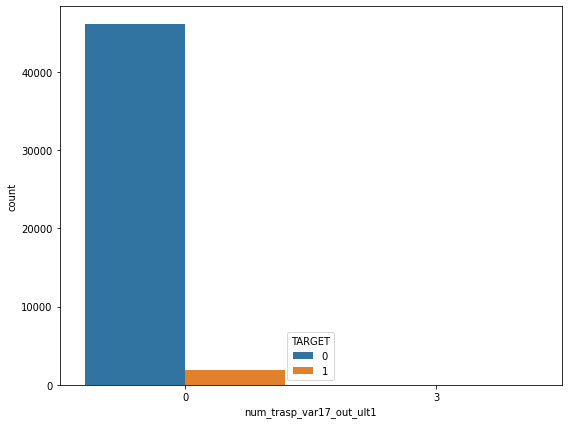

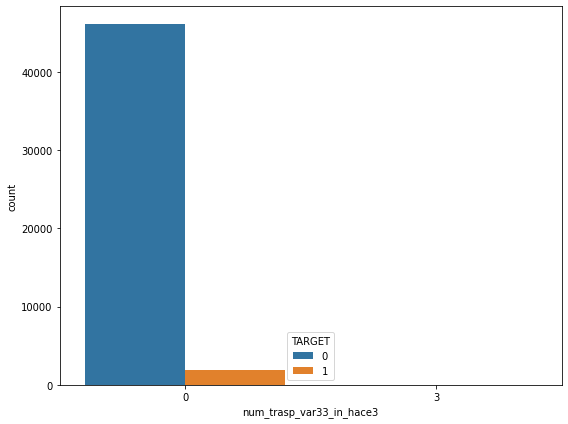

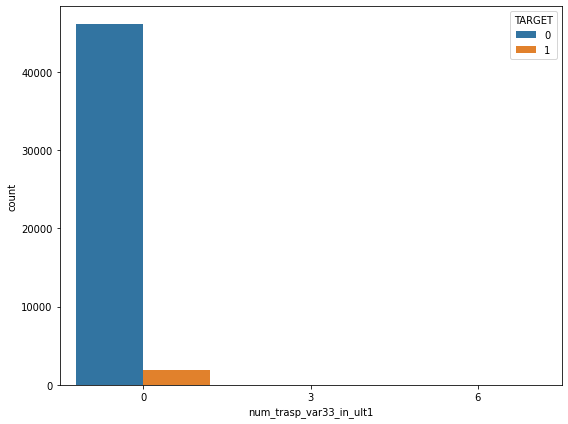

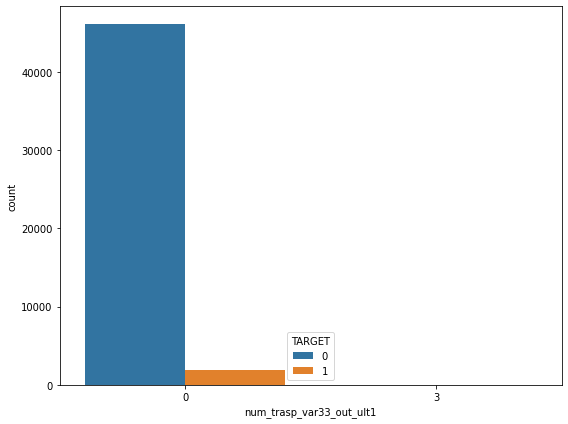

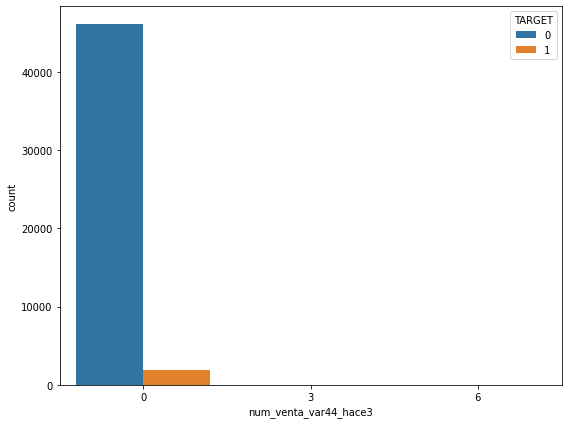

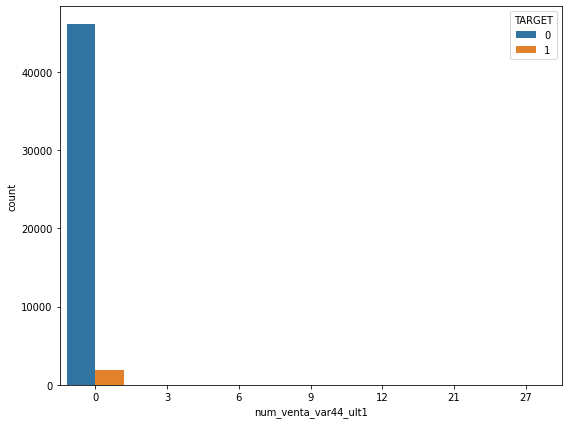

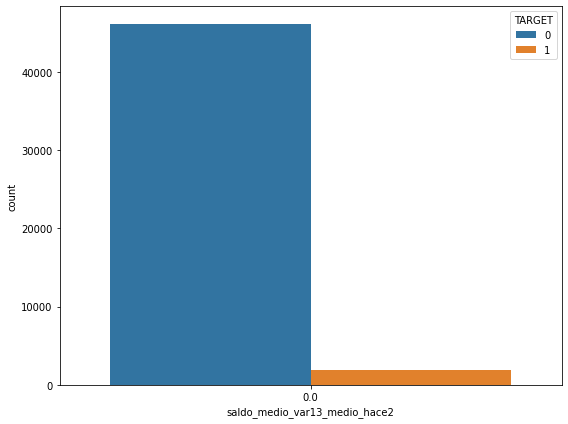

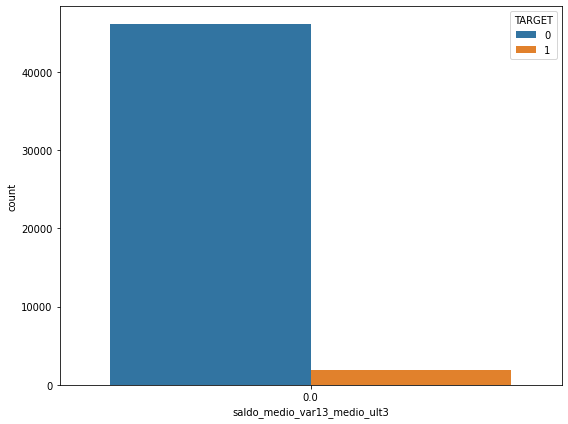

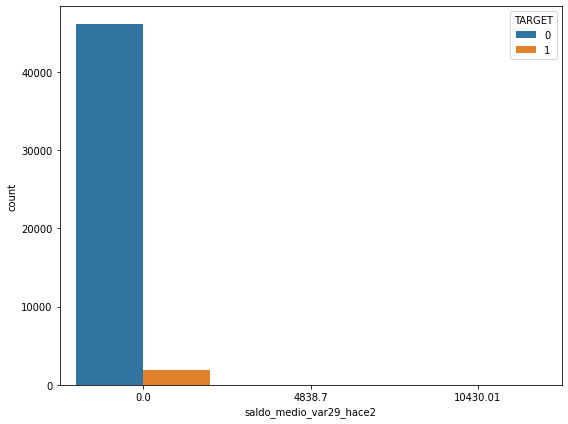

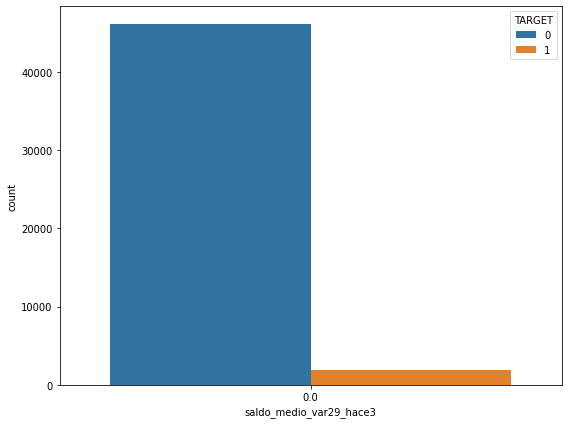

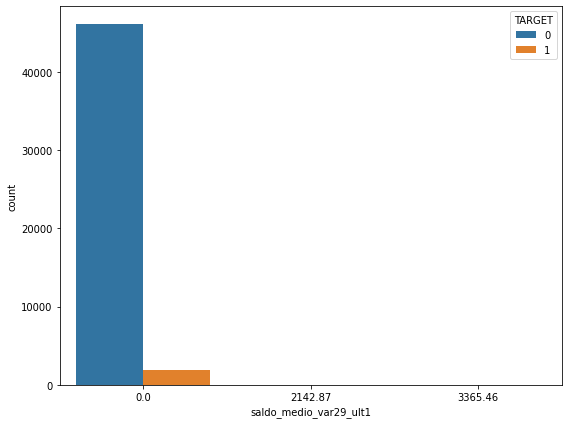

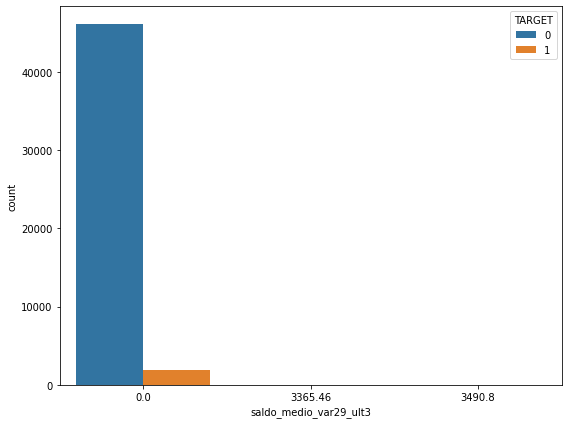

In [23]:
# Análise bivariada das variáveis categóricas // Bivariate analysis of categorical variables

def plot_countplot_cat_target(df, target, features_list:list, qtd_subplots:int=50,):
    """
    Função para análise bivariada de variáveis categóricas com gráficos de contagem da biblioteca Seaborn.
    Function for bivariate analysis of categorical variables with count graphs from the Seaborn library.
    """
    for i in range(0, len(features_list)):
        plt.figure(figsize = (8, 6))
        chart = sns.countplot(x = features_list[i], data = df, hue = target)
        plt.tight_layout()

    return chart


# Chamada à função
plot_countplot_cat_target(df_train3, target, cat_features);


In [24]:
for feat in cat_features:
    print(df_train3[feat].value_counts()) 

0    47414
1      571
Name: ind_var1_0, dtype: int64
0    47786
1      199
Name: ind_var1, dtype: int64
1    45857
0     2128
Name: ind_var5_0, dtype: int64
1    32581
0    15404
Name: ind_var5, dtype: int64
0    47980
1        5
Name: ind_var6_0, dtype: int64
0    47984
1        1
Name: ind_var6, dtype: int64
0    46323
1     1662
Name: ind_var8_0, dtype: int64
0    46526
1     1459
Name: ind_var8, dtype: int64
0    44524
1     3461
Name: ind_var12_0, dtype: int64
0    45650
1     2335
Name: ind_var12, dtype: int64
0    45353
1     2632
Name: ind_var13_0, dtype: int64
0    45826
1     2159
Name: ind_var13_corto_0, dtype: int64
0    45899
1     2086
Name: ind_var13_corto, dtype: int64
0    47470
1      515
Name: ind_var13_largo_0, dtype: int64
0    47481
1      504
Name: ind_var13_largo, dtype: int64
0    45423
1     2562
Name: ind_var13, dtype: int64
0    46775
1     1210
Name: ind_var14_0, dtype: int64
0    47723
1      262
Name: ind_var14, dtype: int64
0    47890
1       95
Name: in

_**Observação:**_
Muitas variáveis categóricas apresentam categorias com frequência muito baixa, o que sugere pouca representatividade para a previsão da target.
---
_**Observation:**_
_Many categorical variables present categories with a very low frequency, which suggests little representativeness for the target prediction._

In [25]:
# Remoção das variáveis categóricas com alta esparsidade (percentil 99 = 0)
# Removal of categorical variables with high sparsity

sparse_feats = []
for feat in cat_features:
    if np.percentile(df_train3[feat], 99) == 0:
        sparse_feats.append(feat)

print(len(cat_features))
print(len(sparse_feats)) # excluir as features esparsas

print(f'Variáveis excluídas devido à esparsidade: {sparse_feats}')
df_train4 = df_train3.drop(columns = sparse_feats)
df_train4.shape

189
118
Variáveis excluídas devido à esparsidade: ['ind_var1', 'ind_var6_0', 'ind_var6', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var29_0', 'ind_var29', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1', 'num_var6_0', 'num_var6', 'num_var14', 'num_var17', 'num_var20_0', 'num_var20', 'num_op_var40_hace3', 'num_var29_0', 'num_var29', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var40', 'num_var39', 'num_var44_0', 'num_var44', 'saldo_var6', 'saldo_var29', 'saldo_var34', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta

(47985, 140)

In [26]:
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 56183 to 1703
Columns: 140 entries, var15 to TARGET
dtypes: category(72), float64(68)
memory usage: 28.6 MB


In [27]:
# Gravação dos dados transformados em disco // Writing the transformed data to disk
df_train4.to_csv('../datasets/df_train_eng.csv')

In [28]:
df_train4.isnull().any().sum()

0

### DATASET DE TESTE | _TEST DATA SET_

In [29]:
# Carrega os dados // Load the data
# Carrega os dados // Load the data
file2 = 'df_test_cleaned'
df_test = pd.read_parquet(f'../datasets/{file2}.dat')

print(df_test.shape)
display(df_test.head())

(25087, 319)


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
101019,2.0,45.0,0.0,709.05,1399.17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77930.250000,0
10518,2.0,60.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165125.040000,0
43966,2.0,27.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82636.440000,0
85554,2.0,38.0,0.0,269.40,754.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67460.550000,0
37070,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [30]:
print(f'Variáveis excluídas por multicolinearidade: {correlated_features}')
df_test2 = df_test.drop(columns = correlated_features)
df_test2.shape

Variáveis excluídas por multicolinearidade: ['imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'num_var31_0', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult3', 'num_op_var41_ult1', 'num_op_var39_ult3', 'num_op_var39_ult1', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_var37_med_ult2', 'num_var37_0', 'saldo_var8', 'saldo_var24', 'saldo_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var31', 'saldo_var17', 'saldo_var26', 'saldo_var33', 'saldo_var44', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'imp_venta_var44_ult1', 'num_var22_ult3', 'num_var45_hace2', 'num_var45_ult3', 'num_op_var39_comer_ult3', 'num_op_var41_efect_ult3', 'num_op_var41_efect_ult1', 'num_op_var39_efect_ult3', 'saldo_medio_var8_ult3', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_v

(25087, 271)

In [31]:
print(f'Variáveis excluídas devido à forma da distribuição: {not_gauss_feat}')
df_test3 = df_test2.drop(columns = not_gauss_feat)
df_test3.shape

Variáveis excluídas devido à forma da distribuição: ['num_var43_emit_ult1', 'delta_imp_aport_var13_1y3', 'num_var37', 'num_trasp_var11_ult1', 'num_var35', 'num_var45_ult1', 'num_ent_var16_ult1', 'var3', 'num_var22_ult1', 'num_op_var39_efect_ult1', 'num_var43_recib_ult1', 'num_var22_hace3', 'num_var22_hace2']


(25087, 258)

In [32]:
print(f'Variáveis excluídas devido à esparsidade: {sparse_feats}')
df_test4 = df_test3.drop(columns = sparse_feats)
df_test4.shape

Variáveis excluídas devido à esparsidade: ['ind_var1', 'ind_var6_0', 'ind_var6', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var29_0', 'ind_var29', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1', 'num_var6_0', 'num_var6', 'num_var14', 'num_var17', 'num_var20_0', 'num_var20', 'num_op_var40_hace3', 'num_var29_0', 'num_var29', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var40', 'num_var39', 'num_var44_0', 'num_var44', 'saldo_var6', 'saldo_var29', 'saldo_var34', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_ven

(25087, 140)

In [33]:
# Gravação dos dados transformados em disco // Writing the transformed data to disk
df_test4.to_csv('../datasets/df_test_eng.csv')

In [34]:
df_test4.isnull().any().sum()

0